In [1]:
#https://www.kaggle.com/code/rtatman/six-steps-to-more-professional-data-science-code/notebook
#https://towardsdatascience.com/8-guidelines-to-create-professional-data-science-notebooks-97572894b2e5

#API to use Elexon Apis better
#https://github.com/OSUKED/ElexonDataPortal
#https://osuked.github.io/ElexonDataPortal/08-quick-start/

#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

#regresinon forccasting

#https://blog.paperspace.com/time-series-forecasting-regression-and-lstm/

#https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial

#https://moodle.ucl.ac.uk/pluginfile.php/4336726/mod_resource/content/0/lecture5.pdf

#https://machinelearningmastery.com/time-series-seasonality-with-python/#:~:text=A%20cycle%20structure%20in%20a,and%20is%20called%20a%20cycle.

#https://builtin.com/data-science/when-and-why-standardize-your-data

#https://machinelearningmastery.com/normalize-standardize-time-series-data-python/


In [22]:
from ElexonDataPortal import api
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Utilising the Elexon Data Portal API rapper to retreive data from the Elexon API.

In [26]:
from ElexonDataPortal import api
client = api.Client('52g2ac5kwwh5chc')
start_date = '2020-01-01'
end_date = '2020-02-29 23:30'

In [ ]:
#todofordatarocessingandfeaturengieering
#feature engineering required for imbalance prices snd imbalance volume
#date:timebreakdown: day,month,type of day(Mon-Sunday),weekend or weekdays
#addthefollwoing: Solar,wind generation(forcasts vs actual generation)
#sine and cosine transformation for the timeframes
#lag varaible per day
#category: pricecategory(2 different dataframes)
#add weather data(later)



In [ ]:
#API services needed.

#example of potentially 
# LOLP with five ahead-of-time values, five corresponding De-rated Margins (DRM), Settlement Periods (SP), Production, Wind and Solar Generation, NIV or Net Imbalance Volume (NetImbVol), Weekdays, Months, Day-ahead Price (Price DA) and the Initial Transmission System Demand (Itsd), or simply system load.

#testing use a weeks worth of data.

#prices of procured balancing reserves: B1730
#imbalance prices: B1770
#Aggregated Imbalance Volumes: B1780
#potentially: Day ahead lOAD FORCAST: B0620
#day-ahead generation: B1430
#gneration forcast wind and solar: B1440
#actual egenration per type: B1620
#Actual or estimated wind and solar power generation: B1630

In [3]:
#parameters required per api call
print(client.get_B1780.__doc__)
print(client.get_B1770.__doc__)
print(client.get_B0620.__doc__)
print(client.get_B1430.__doc__)
print(client.get_B1440.__doc__)
print(client.get_B1620.__doc__)
print(client.get_B1630.__doc__)
#time period


        Aggregated Imbalance Volumes
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Imbalance Prices
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Day-Ahead Total Load Forecast per Bidding Zone
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Day-Ahead Aggregated Generation
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Generation forecasts for Wind and Solar
        
        Parameters:
            start_date (str)
            end_date (str)
            ProcessType (str)
        

        Actual Aggregated Generation per Type
        
        Parameters:
            start_date (str)
            end_date (str)
        

        Actual Or Estimated Wind and Solar Power Generation
        
        Parameters:
            start_date (str)
            end_date (str)
   

In [16]:
# from elexon import ElexonRawClient

# api_test = ElexonRawClient('52g2ac5kwwh5chc') # available for free from the Elexon Portal

# # Actual Aggregated Generation per Type
# # Alternatively, use the general request() function by passing the endpoint in with the arguments:
# generation = api_test.request('B1780', SettlementDate = '2020-01-01', Period = '10',start_date="2020-01-01")
# generation

[{'timeSeriesId': 'ELX-EMFIP-AIMBV-TS-1',
  'businessType': 'Balance energy deviation',
  'controlArea': '10YGB----------A',
  'settlementDate': datetime.date(2020, 1, 1),
  'settlementPeriod': 10,
  'imbalanceQuantityMAW': -102.3296,
  'curveType': 'Sequential fixed size block',
  'resolution': 'PT30M',
  'documentType': 'Imbalance volume',
  'processType': 'Realised',
  'activeFlag': True,
  'docStatus': 'Final',
  'documentID': 'ELX-EMFIP-AIMBV-22439112',
  'documentRevNum': 1,
  'imbalanceQuantityDirection': 'DEFICIT'}]

In [ ]:
#load forcasts should be used as exogenoues variblae

In [27]:
#Aggregated Imbalance Volumes
df_B1780 = client.get_B1780(start_date, end_date)
df_B1780
#local_datetime and it's feature engineer
#imbalanceQuantityMAW
#imbalance quantity direction


B1780: 100%|██████████| 2879/2879 [10:31<00:00,  4.56it/s] 


,local_datetime,timeSeriesId,businessType,controlArea,settlementDate,settlementPeriod,imbalanceQuantityMAW,curveType,resolution,documentType,processType,activeFlag,docStatus,documentID,documentRevNum,imbalanceQuantityDirection
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,54.3365,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22437929,1,SURPLUS
1,2020-01-01 00:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,194.7133,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22438071,1,SURPLUS
2,2020-01-01 01:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,-71.4292,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22438190,1,DEFICIT
3,2020-01-01 01:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,-122.2322,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22438319,1,DEFICIT
4,2020-01-01 02:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,5,-90.9042,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22438445,1,DEFICIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,2020-02-29 21:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,43,211.2118,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22924992,1,SURPLUS
2875,2020-02-29 21:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,44,283.0102,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22925131,1,SURPLUS
2876,2020-02-29 22:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,45,285.9822,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22925254,1,SURPLUS
2877,2020-02-29 22:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,46,52.8332,Sequential fixed size block,PT30M,Imbalance volume,Realised,Y,Final,ELX-EMFIP-AIMBV-22925395,1,SURPLUS


In [38]:
df_B1780.to_csv (r'C:\Users\Admin\OneDrive\Desktop\esda_work\dissertation\bm_forcasting\data\df_B1780_2020_02_29.csv', index = None, header=True) 

In [28]:
##local_datetime and it's feature engineer
#imbalanceQuantityMAW
#imbalance quantity direction
#settlement period
#num variables
df_B1780['imbalanceQuantityMAW'] = df_B1780['imbalanceQuantityMAW'].astype('float')
df_B1780['imbalanceQuantityMAW'] = df_B1780['imbalanceQuantityMAW'].round(decimals = 2)
#categorical variables
df_B1780['imbalanceQuantityDirection'] =df_B1780['imbalanceQuantityDirection'].astype('category')
df_B1780['settlementPeriod'] =df_B1780['settlementPeriod'].astype('category')


In [29]:
#datetime, extract the settlement times which are every 30 mins 
#weekday 0=mon, > end
#df_B1770.info()
#false = weekday, true = weeekend
import datetime as dt
df_B1780['local_time'] = pd.to_datetime(df_B1780['local_datetime'], format='%H%M').dt.time
df_B1780['Year'] = df_B1780.local_datetime.dt.year
df_B1780 ['Month'] = df_B1780.local_datetime.dt.month
df_B1780 ['weekday'] = df_B1780.local_datetime.dt.weekday
df_B1780 ['Hour'] = df_B1780.local_datetime.dt.hour
df_B1780 ['Minute'] = df_B1780.local_datetime.dt.minute
df_B1780['typ_of_day'] = df_B1780.local_datetime.dt.weekday >=5
df_B1780.head()

,local_datetime,timeSeriesId,businessType,controlArea,settlementDate,settlementPeriod,imbalanceQuantityMAW,curveType,resolution,documentType,...,documentID,documentRevNum,imbalanceQuantityDirection,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,54.34,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22437929,1,SURPLUS,00:00:00,2020,1,2,0,0,False
1,2020-01-01 00:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,194.71,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22438071,1,SURPLUS,00:30:00,2020,1,2,0,30,False
2,2020-01-01 01:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,-71.43,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22438190,1,DEFICIT,01:00:00,2020,1,2,1,0,False
3,2020-01-01 01:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,-122.23,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22438319,1,DEFICIT,01:30:00,2020,1,2,1,30,False
4,2020-01-01 02:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,5,-90.90,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22438445,1,DEFICIT,02:00:00,2020,1,2,2,0,False


In [30]:
df_B1780['typ_of_day'] = df_B1780['typ_of_day'].astype('str')
df_B1780['typ_of_day'] = df_B1780['typ_of_day'].astype('category')
df_B1780['typ_of_day'].cat.rename_categories({'False':'Weekday', 'True': 'Weekend'}, inplace=True)
df_B1780['typ_of_day'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\4127522329.py:3: FutureWarning:

The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



['Weekday', 'Weekend']
Categories (2, object): ['Weekday', 'Weekend']

In [31]:
df_B1780.tail()

,local_datetime,timeSeriesId,businessType,controlArea,settlementDate,settlementPeriod,imbalanceQuantityMAW,curveType,resolution,documentType,...,documentID,documentRevNum,imbalanceQuantityDirection,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
2874,2020-02-29 21:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,43,211.21,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22924992,1,SURPLUS,21:00:00,2020,2,5,21,0,Weekend
2875,2020-02-29 21:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,44,283.01,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22925131,1,SURPLUS,21:30:00,2020,2,5,21,30,Weekend
2876,2020-02-29 22:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,45,285.98,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22925254,1,SURPLUS,22:00:00,2020,2,5,22,0,Weekend
2877,2020-02-29 22:30:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,46,52.83,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22925395,1,SURPLUS,22:30:00,2020,2,5,22,30,Weekend
2878,2020-02-29 23:00:00+00:00,ELX-EMFIP-AIMBV-TS-1,Balance energy deviation,10YGB----------A,2020-02-29,47,-35.78,Sequential fixed size block,PT30M,Imbalance volume,...,ELX-EMFIP-AIMBV-22925555,1,DEFICIT,23:00:00,2020,2,5,23,0,Weekend


In [32]:
df_B1780['Lag_1']= df_B1780['imbalanceQuantityMAW'].shift(1)
df_B1780['hour_sin']  = np.sin(2*np.pi*df_B1780['Hour']/23.0)
df_B1780['hour_cos']  = np.cos(2*np.pi*df_B1780['Hour']/23.0)

In [33]:
#check for nas and clean up

df_B1780.isna().sum(axis = 0)

local_datetime                0
timeSeriesId                  0
businessType                  0
controlArea                   0
settlementDate                0
settlementPeriod              0
imbalanceQuantityMAW          0
curveType                     0
resolution                    0
documentType                  0
processType                   0
activeFlag                    0
docStatus                     0
documentID                    0
documentRevNum                0
imbalanceQuantityDirection    0
local_time                    0
Year                          0
Month                         0
weekday                       0
Hour                          0
Minute                        0
typ_of_day                    0
Lag_1                         1
hour_sin                      0
hour_cos                      0
dtype: int64

In [34]:
df_B1780_EDA = df_B1780[["imbalanceQuantityMAW","Lag_1", "settlementPeriod","imbalanceQuantityDirection","local_datetime","local_time","Year", "Month", "weekday", "Hour","Minute",  "typ_of_day", "hour_sin", "hour_cos"]]

In [35]:
df_B1780_EDA.head()

,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,Minute,typ_of_day,hour_sin,hour_cos
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,0,Weekday,0.000000,1.000000
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,30,Weekday,0.000000,1.000000
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,0,Weekday,0.269797,0.962917
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,30,Weekday,0.269797,0.962917
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,0,Weekday,0.519584,0.854419


Text(0.5, 1.0, 'Distribution of Net Imbalance Volume')

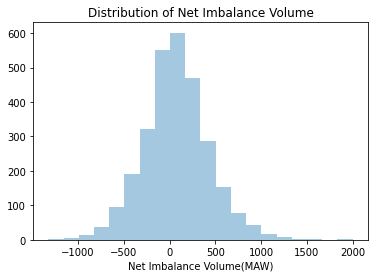

In [42]:
#EDA
#df_B1780_EDA.head()

#EDA
#distiriution of volume
#volume vs weekday(boxplot, bar plots)
#volume vs type of day(weekend/weekday)
#volume vs hour in the day(averageed for the week)
#prices vs renewable generation
#find lolp data

vol_dist = sns.distplot(a=df_B1780_EDA["imbalanceQuantityMAW"], hist=True, color="purple", kde=False, rug=False, bins=20)
vol_dist.set_xlabel("Net Imbalance Volume(MAW)")
#vol_dist.set_ylabel("Net Imbalance Volume(MAW)"
vol_dist.set_title("Distribution of Net Imbalance Volume")

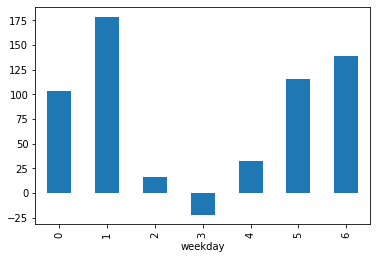

In [43]:
#https://stackoverflow.com/questions/63364949/how-to-plot-a-bar-plot-of-mean-value-by-category

#for now shows that there is a high demand foor imbalnces on wednedays 
#fridays there seems to be less demand for imbalance volumes

#weekday_imabalnce_bar = df_B1780_EDA.groupby('weekday')['imbalanceQuantityMAW'].mean().plot.bar()

weekday_imbalance_bar = df_B1780_EDA.groupby('weekday')['imbalanceQuantityMAW'].mean()
weekday_imbalance_bar_graph = sns.barplot(x=weekday_imbalance_bar["weekday"],y=weekday_imbalance_bar["imbalanceQuantityMAW"],
 hist=True, color="purple", kde=False, rug=False, bins=20)
weekday_imbalance_bar_graph.set_xlabel("Net Imbalance Volume(MAW)")
#vol_dist.set_ylabel("Net Imbalance Volume(MAW)")
weekday_imbalance_bar_graph.set_title("Mean Imbalance Quantity Over weekdays")
 
#to plot in seaborn make new dataframe and plot
#assign groupby mean to new datafram
#plot bar plot with the volume as Y and the other variable on X and plot.

#going to use facet and plot the mean for, weekdays, month, hour, type of day on one 

<AxesSubplot:xlabel='Hour'>

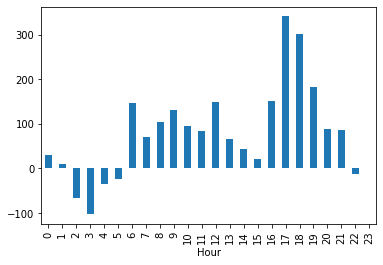

In [44]:
df_B1780_EDA.groupby('Hour')['imbalanceQuantityMAW'].mean().plot.bar()

<AxesSubplot:xlabel='typ_of_day'>

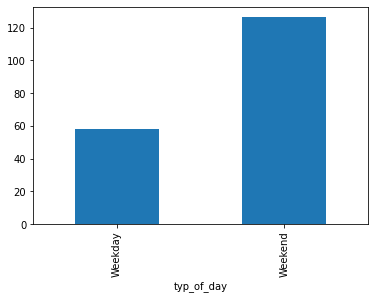

In [56]:
df_B1780_EDA.groupby('typ_of_day')['imbalanceQuantityMAW'].mean().plot.bar()

<AxesSubplot:xlabel='Month'>

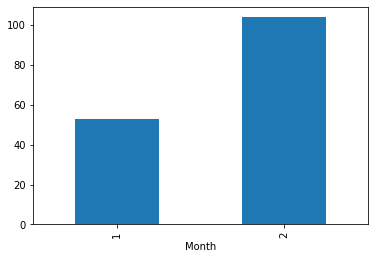

In [45]:
df_B1780_EDA.groupby('Month')['imbalanceQuantityMAW'].mean().plot.bar()

In [46]:
df_B1780_EDA.describe()

,imbalanceQuantityMAW,Lag_1,Year,Month,weekday,Hour,Minute,hour_sin,hour_cos
count,2879.000000,2878.000000,2879.0,2879.000000,2879.000000,2879.000000,2879.000000,2.879000e+03,2879.000000
mean,77.447482,77.486824,2020.0,1.483154,3.032650,11.496006,14.994790,-2.714821e-17,0.041334
std,359.356471,359.412717,0.0,0.499803,1.957943,6.921271,15.002605,6.924591e-01,0.720513
min,-1326.150000,-1326.150000,2020.0,1.000000,0.000000,0.000000,0.000000,-9.976688e-01,-0.990686
25%,-140.745000,-140.792500,2020.0,1.000000,1.000000,5.500000,0.000000,-6.809620e-01,-0.676196
50%,67.450000,67.765000,2020.0,1.000000,3.000000,11.000000,0.000000,0.000000e+00,-0.068242
75%,284.270000,284.275000,2020.0,2.000000,5.000000,17.000000,30.000000,6.809620e-01,0.682553
max,2000.970000,2000.970000,2020.0,2.000000,6.000000,23.000000,30.000000,9.976688e-01,1.000000


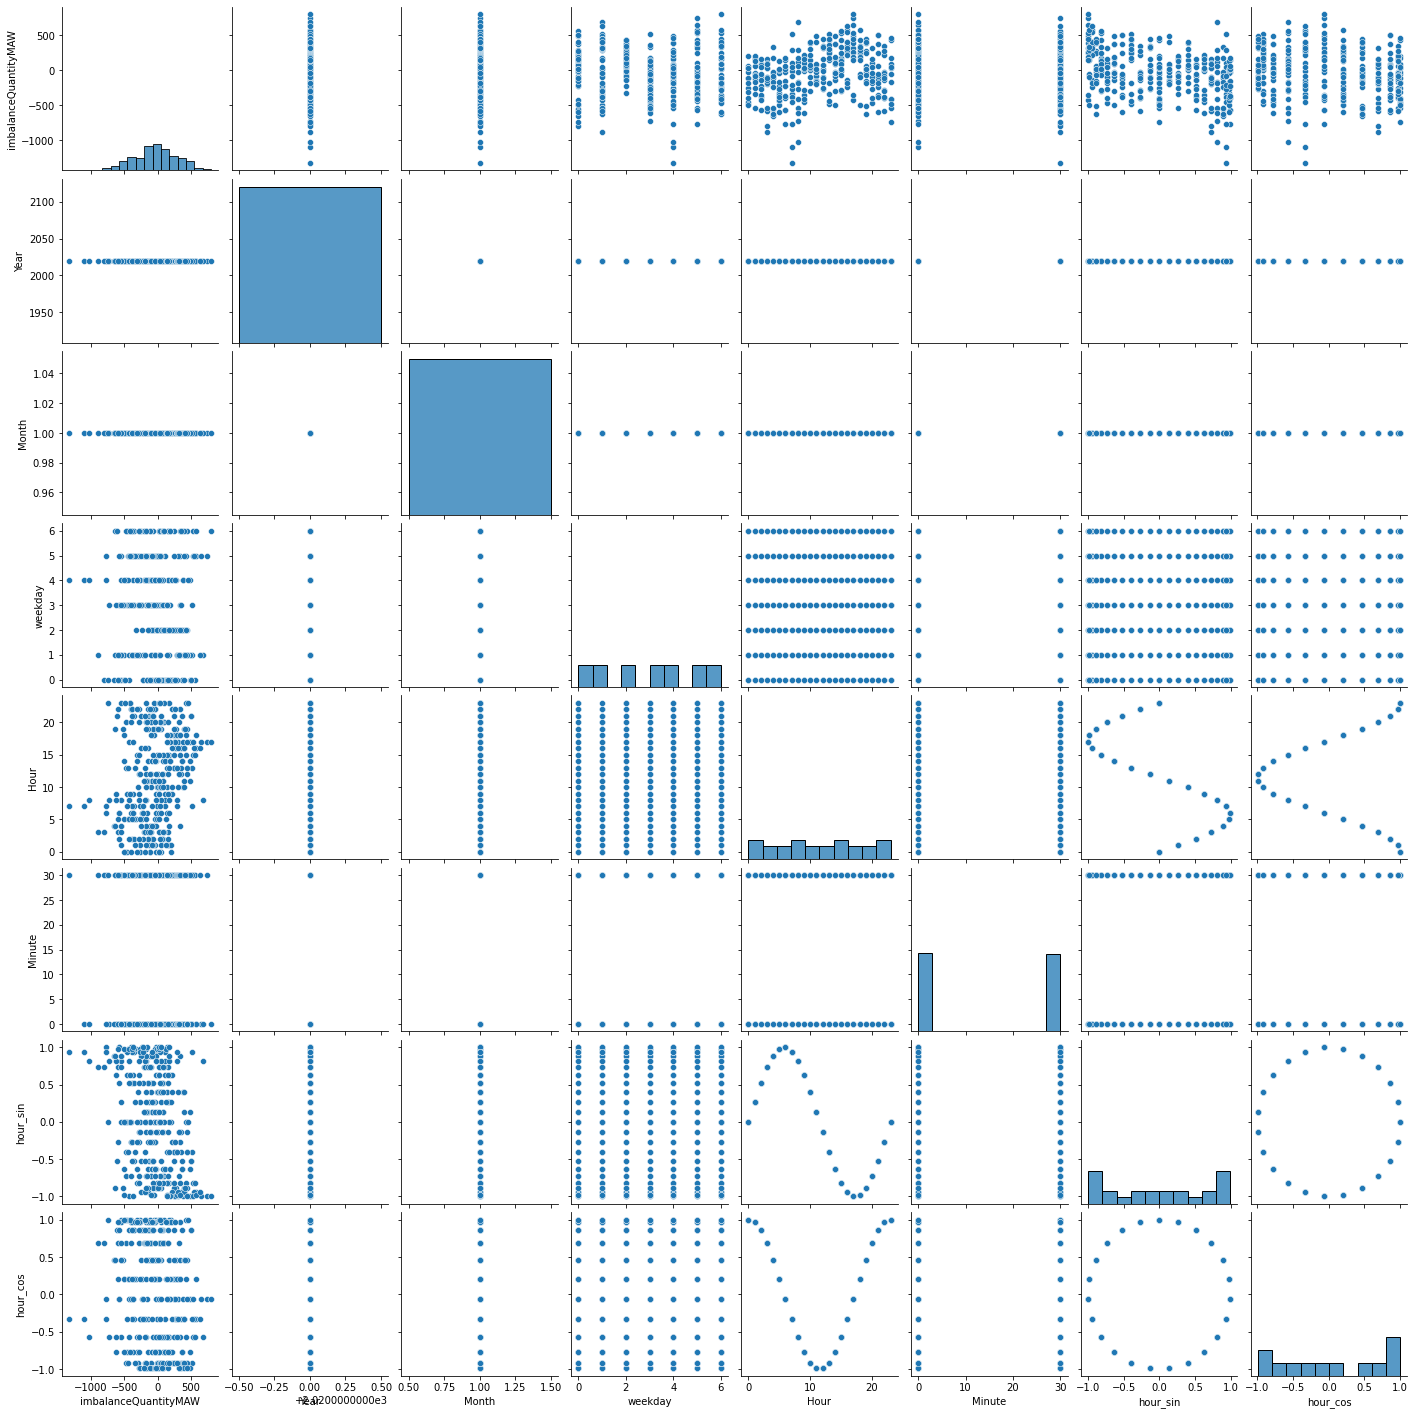

In [32]:
sns.pairplot(df_B1780_EDA)

<AxesSubplot:xlabel='settlementPeriod'>

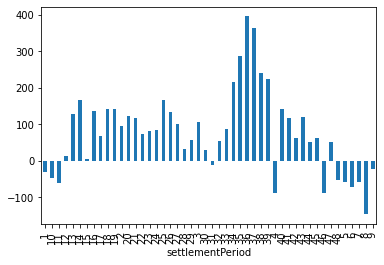

In [47]:
df_B1780_EDA.groupby('settlementPeriod')['imbalanceQuantityMAW'].mean().plot.bar()

In [48]:
import plotly.express as px

#df = px.data.stocks()

#date_time
#scatter time 
fig = px.line(df_B1780_EDA, x= 'local_datetime', y= 'imbalanceQuantityMAW')
#fig2 = px.line(df_B1780_EDA, x= 'local_datetime',y='imbalanceQuantityMAW')
fig.show()

In [49]:
#day head  egenration per type: B1620
df_B1430= client.get_B1430(start_date, end_date)
df_B1430.head()

B1430: 100%|██████████| 2879/2879 [16:03<00:00,  2.99it/s] 


,local_datetime,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,activeFlag,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24897,Sequential fixed size block,PT30M,2020-01-01,1,Y,NGET-EMFIP-DAG-00035703,1
1,2020-01-01 00:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24701,Sequential fixed size block,PT30M,2020-01-01,2,Y,NGET-EMFIP-DAG-00035703,1
2,2020-01-01 01:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24307,Sequential fixed size block,PT30M,2020-01-01,3,Y,NGET-EMFIP-DAG-00035703,1
3,2020-01-01 01:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23833,Sequential fixed size block,PT30M,2020-01-01,4,Y,NGET-EMFIP-DAG-00035703,1
4,2020-01-01 02:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23557,Sequential fixed size block,PT30M,2020-01-01,5,Y,NGET-EMFIP-DAG-00035703,1


In [51]:
df_B1430.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype                        
---  ------            --------------  -----                        
 0   local_datetime    2879 non-null   datetime64[ns, Europe/London]
 1   documentType      2879 non-null   object                       
 2   businessType      2879 non-null   object                       
 3   processType       2879 non-null   object                       
 4   timeSeriesID      2879 non-null   object                       
 5   quantity          2879 non-null   object                       
 6   curveType         2879 non-null   object                       
 7   resolution        2879 non-null   object                       
 8   settlementDate    2879 non-null   object                       
 9   settlementPeriod  2879 non-null   object                       
 10  activeFlag        2879 non-null   object                    

In [52]:
df_B1430['quantity'] = df_B1430['quantity'].astype('int')
#categorical variables
df_B1430['settlementPeriod'] =df_B1430['settlementPeriod'].astype('category')

In [53]:
import datetime as dt
df_B1430['local_time'] = pd.to_datetime(df_B1430['local_datetime'], format='%H%M').dt.time
df_B1430['Year'] = df_B1430.local_datetime.dt.year
df_B1430['Month'] = df_B1430.local_datetime.dt.month
df_B1430 ['weekday'] = df_B1430.local_datetime.dt.weekday
df_B1430 ['Hour'] = df_B1430.local_datetime.dt.hour
df_B1430['Minute'] = df_B1430.local_datetime.dt.minute
df_B1430['typ_of_day'] = df_B1430.local_datetime.dt.weekday >=5
df_B1430.head()

,local_datetime,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,activeFlag,documentID,documentRevNum,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
0,2020-01-01 00:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24897,Sequential fixed size block,PT30M,2020-01-01,1,Y,NGET-EMFIP-DAG-00035703,1,00:00:00,2020,1,2,0,0,False
1,2020-01-01 00:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24701,Sequential fixed size block,PT30M,2020-01-01,2,Y,NGET-EMFIP-DAG-00035703,1,00:30:00,2020,1,2,0,30,False
2,2020-01-01 01:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24307,Sequential fixed size block,PT30M,2020-01-01,3,Y,NGET-EMFIP-DAG-00035703,1,01:00:00,2020,1,2,1,0,False
3,2020-01-01 01:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23833,Sequential fixed size block,PT30M,2020-01-01,4,Y,NGET-EMFIP-DAG-00035703,1,01:30:00,2020,1,2,1,30,False
4,2020-01-01 02:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23557,Sequential fixed size block,PT30M,2020-01-01,5,Y,NGET-EMFIP-DAG-00035703,1,02:00:00,2020,1,2,2,0,False


In [54]:
df_B1430['typ_of_day'] = df_B1430['typ_of_day'].astype('str')
df_B1430['typ_of_day'] = df_B1430['typ_of_day'].astype('category')
df_B1430['typ_of_day'].cat.rename_categories({'False':'Weekday', 'True': 'Weekend'}, inplace=True)
df_B1430['typ_of_day'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\869852267.py:3: FutureWarning:

The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



['Weekday', 'Weekend']
Categories (2, object): ['Weekday', 'Weekend']

In [55]:
#label encode the weekday: 
df_B1430.head()
df_B1430.describe()

,local_datetime,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,activeFlag,documentID,documentRevNum,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
0,2020-01-01 00:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24897,Sequential fixed size block,PT30M,2020-01-01,1,Y,NGET-EMFIP-DAG-00035703,1,00:00:00,2020,1,2,0,0,Weekday
1,2020-01-01 00:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24701,Sequential fixed size block,PT30M,2020-01-01,2,Y,NGET-EMFIP-DAG-00035703,1,00:30:00,2020,1,2,0,30,Weekday
2,2020-01-01 01:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24307,Sequential fixed size block,PT30M,2020-01-01,3,Y,NGET-EMFIP-DAG-00035703,1,01:00:00,2020,1,2,1,0,Weekday
3,2020-01-01 01:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23833,Sequential fixed size block,PT30M,2020-01-01,4,Y,NGET-EMFIP-DAG-00035703,1,01:30:00,2020,1,2,1,30,Weekday
4,2020-01-01 02:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23557,Sequential fixed size block,PT30M,2020-01-01,5,Y,NGET-EMFIP-DAG-00035703,1,02:00:00,2020,1,2,2,0,Weekday


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Day ahead quantity')

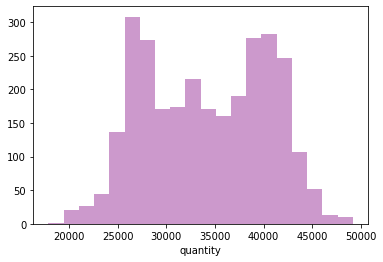

In [59]:
dayahead_dist = sns.distplot(a=df_B1430["quantity"], hist=True, color="purple", kde=False, rug=False, bins=20)
vol_dist.set_xlabel("Day ahead Quantityt(MAW)")
#vol_dist.set_ylabel("Net Imbalance Volume(MAW)"
vol_dist.set_title("Distribution of Day ahead quantity")

<AxesSubplot:xlabel='weekday'>

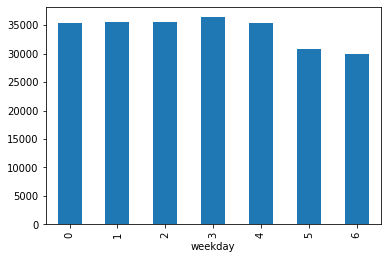

In [63]:
#df_B1430
df_B1430.groupby('weekday')['quantity'].mean().plot.bar()

<AxesSubplot:xlabel='typ_of_day'>

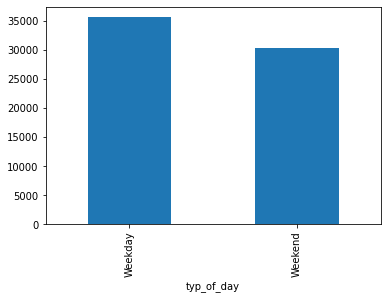

In [62]:
df_B1430.groupby('typ_of_day')['quantity'].mean().plot.bar()

In [64]:
import plotly.express as px

#df = px.data.stocks()

#date_time
#scatter time 
fig2 = px.line(df_B1430, x= 'local_datetime', y= 'quantity')
#fig2 = px.line(df_B1780_EDA, x= 'local_datetime',y='imbalanceQuantityMAW')
fig2.show()

In [6]:
#Actual or estimated wind and solar power generation: B1630
df_B1630 = client.get_B1630(start_date, end_date)
df_B1630.head()

B1630: 100%|██████████| 47/47 [00:11<00:00,  3.96it/s]


,local_datetime,timeSeriesID,businessType,powerSystemResourceType,settlementDate,settlementPeriod,quantity,documentType,processType,curveType,resolution,activeFlag,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,NGET-EMFIP-AGWS-TS-00306115,Solar generation,"""Solar""",2020-01-01,1,0,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00150895,1
1,2020-01-01 00:00:00+00:00,NGET-EMFIP-AGWS-TS-00306116,Wind generation,"""Wind Offshore""",2020-01-01,1,2335.105,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00150895,1
2,2020-01-01 00:00:00+00:00,NGET-EMFIP-AGWS-TS-00306117,Wind generation,"""Wind Onshore""",2020-01-01,1,3017.245,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00150895,1
3,2020-01-01 00:30:00+00:00,NGET-EMFIP-AGWS-TS-00306118,Solar generation,"""Solar""",2020-01-01,2,0,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00150896,1
4,2020-01-01 00:30:00+00:00,NGET-EMFIP-AGWS-TS-00306119,Wind generation,"""Wind Offshore""",2020-01-01,2,2541.627,Wind and solar generation,Realised,Sequential fixed size block,PT30M,Y,NGET-EMFIP-AGWS-00150896,1


In [65]:
#actual gneration forcast wind and solar: B1440
df_B1440 = client.get_B1440(start_date, end_date)
df_B1440.head()

B1440: 100%|██████████| 2879/2879 [18:50<00:00,  2.55it/s] 


,local_datetime,timeSeriesID,businessType,powerSystemResourceType,settlementDate,processType,settlementPeriod,quantity,documentType,curveType,resolution,activeFlag,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,NGET-EMFIP-DGWS-TS-00034592,Solar generation,"""Solar""",2020-01-01,Day Ahead,1,0,Wind and solar forecast,Sequential fixed size block,PT30M,Y,NGET-EMFIP-DGWS-00035923,1
1,2020-01-01 00:00:00+00:00,NGET-EMFIP-DGWS-TS-00034590,Wind generation,"""Wind Offshore""",2020-01-01,Day Ahead,1,2843.181,Wind and solar forecast,Sequential fixed size block,PT30M,Y,NGET-EMFIP-DGWS-00035923,1
2,2020-01-01 00:00:00+00:00,NGET-EMFIP-DGWS-TS-00034591,Wind generation,"""Wind Onshore""",2020-01-01,Day Ahead,1,3024.238,Wind and solar forecast,Sequential fixed size block,PT30M,Y,NGET-EMFIP-DGWS-00035923,1
3,2020-01-01 00:30:00+00:00,NGET-EMFIP-DGWS-TS-00034592,Solar generation,"""Solar""",2020-01-01,Day Ahead,2,0,Wind and solar forecast,Sequential fixed size block,PT30M,Y,NGET-EMFIP-DGWS-00035923,1
4,2020-01-01 00:30:00+00:00,NGET-EMFIP-DGWS-TS-00034590,Wind generation,"""Wind Offshore""",2020-01-01,Day Ahead,2,2843.181,Wind and solar forecast,Sequential fixed size block,PT30M,Y,NGET-EMFIP-DGWS-00035923,1


In [78]:
df_B1440['quantity'] = df_B1440['quantity'].astype('float')
#categorical variables
df_B1440['settlementPeriod'] =df_B1440['settlementPeriod'].astype('category')

In [75]:
import datetime as dt
df_B1440['local_time'] = pd.to_datetime(df_B1430['local_datetime'], format='%H%M').dt.time
df_B1440['Year'] = df_B1430.local_datetime.dt.year
df_B1440['Month'] = df_B1430.local_datetime.dt.month
df_B1440 ['weekday'] = df_B1430.local_datetime.dt.weekday
df_B1440 ['Hour'] = df_B1430.local_datetime.dt.hour
df_B1440['Minute'] = df_B1430.local_datetime.dt.minute
df_B1440['typ_of_day'] = df_B1430.local_datetime.dt.weekday >=5

In [76]:
df_B1440['typ_of_day'] = df_B1440['typ_of_day'].astype('str')
df_B1440['typ_of_day'] = df_B1440['typ_of_day'].astype('category')
df_B1440['typ_of_day'].cat.rename_categories({'False':'Weekday', 'True': 'Weekend'}, inplace=True)
df_B1440['typ_of_day'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\1564838231.py:3: FutureWarning:

The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



['Weekday', 'Weekend', 'nan']
Categories (3, object): ['Weekday', 'Weekend', 'nan']

In [80]:
df_B1440_solar= df_B1440.loc[df_B1440['businessType']=='Solar generation']
df_B1440_solar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 19428
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   local_datetime           6477 non-null   datetime64[ns, Europe/London]
 1   timeSeriesID             6477 non-null   object                       
 2   businessType             6477 non-null   object                       
 3   powerSystemResourceType  6477 non-null   object                       
 4   settlementDate           6477 non-null   object                       
 5   processType              6477 non-null   object                       
 6   settlementPeriod         6477 non-null   category                     
 7   quantity                 6477 non-null   float64                      
 8   documentType             6477 non-null   object                       
 9   curveType                6477 non-null   object    

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Solar Forcasts')

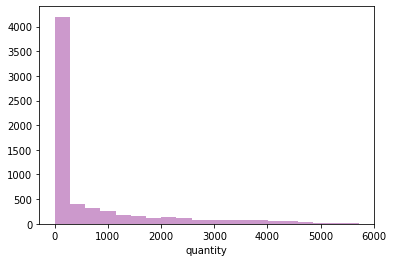

In [84]:
#EDA
df_B1440_solar_dist = sns.distplot(a=df_B1440_solar["quantity"], hist=True, color="purple", kde=False, rug=False, bins=20)
vol_dist.set_xlabel("Day ahead Quantity Solar(MAW)")
#vol_dist.set_ylabel("Net Imbalance Volume(MAW)"
vol_dist.set_title("Solar Forcasts")

In [81]:
df_B1440_wind = df_B1440.loc[df_B1440['businessType']=='Wind generation']


In [82]:
#group by for the join 
df_B1440_wind_groupby = df_B1440_wind.groupby('local_datetime')['quantity'].sum()
df_B1440_wind_groupby.head()

local_datetime
2020-01-01 00:00:00+00:00    5867.419
2020-01-01 00:30:00+00:00    5867.419
2020-01-01 01:00:00+00:00    5633.187
2020-01-01 01:30:00+00:00    5633.187
2020-01-01 02:00:00+00:00    5460.596
Name: quantity, dtype: float64

In [85]:
df_B0620 = client.get_B0620(start_date, end_date)
df_B0620.head()

B0620: 100%|██████████| 2879/2879 [17:47<00:00,  2.70it/s]  


,local_datetime,timeSeriesID,settlementDate,settlementPeriod,quantity,documentType,businessType,processType,objectAggregation,curveType,resolution,unitOfMeasure,activeFlag,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,1,27684,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,PT30M,Mega watt,Y,NGET-EMFIP-DATL-00036442,1
1,2020-01-01 00:30:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,2,28315,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,PT30M,Mega watt,Y,NGET-EMFIP-DATL-00036442,1
2,2020-01-01 01:00:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,3,27745,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,PT30M,Mega watt,Y,NGET-EMFIP-DATL-00036442,1
3,2020-01-01 01:30:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,4,26773,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,PT30M,Mega watt,Y,NGET-EMFIP-DATL-00036442,1
4,2020-01-01 02:00:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,5,26099,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,PT30M,Mega watt,Y,NGET-EMFIP-DATL-00036442,1


In [86]:
df_B0620['quantity'] = df_B0620['quantity'].astype('int')
#categorical variables
df_B0620['settlementPeriod'] =df_B0620['settlementPeriod'].astype('category')

In [87]:
import datetime as dt
df_B0620['local_time'] = pd.to_datetime(df_B0620['local_datetime'], format='%H%M').dt.time
df_B0620['Year'] = df_B0620.local_datetime.dt.year
df_B0620['Month'] = df_B0620.local_datetime.dt.month
df_B0620 ['weekday'] = df_B0620.local_datetime.dt.weekday
df_B0620 ['Hour'] = df_B0620.local_datetime.dt.hour
df_B0620['Minute'] = df_B0620.local_datetime.dt.minute
df_B0620['typ_of_day'] = df_B0620.local_datetime.dt.weekday >=5

In [88]:
df_B0620['typ_of_day'] = df_B0620['typ_of_day'].astype('str')
df_B0620['typ_of_day'] = df_B0620['typ_of_day'].astype('category')
df_B0620['typ_of_day'].cat.rename_categories({'False':'Weekday', 'True': 'Weekend'}, inplace=True)
df_B0620['typ_of_day'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\3083482391.py:3: FutureWarning:

The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



['Weekday', 'Weekend']
Categories (2, object): ['Weekday', 'Weekend']

In [89]:
df_B0620.head()

,local_datetime,timeSeriesID,settlementDate,settlementPeriod,quantity,documentType,businessType,processType,objectAggregation,curveType,...,activeFlag,documentID,documentRevNum,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
0,2020-01-01 00:00:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,1,27684,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,...,Y,NGET-EMFIP-DATL-00036442,1,00:00:00,2020,1,2,0,0,Weekday
1,2020-01-01 00:30:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,2,28315,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,...,Y,NGET-EMFIP-DATL-00036442,1,00:30:00,2020,1,2,0,30,Weekday
2,2020-01-01 01:00:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,3,27745,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,...,Y,NGET-EMFIP-DATL-00036442,1,01:00:00,2020,1,2,1,0,Weekday
3,2020-01-01 01:30:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,4,26773,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,...,Y,NGET-EMFIP-DATL-00036442,1,01:30:00,2020,1,2,1,30,Weekday
4,2020-01-01 02:00:00+00:00,NGET-EMFIP-DATL-TS-00036862,2020-01-01,5,26099,System total load,Consumption,Day Ahead,Area,Sequential fixed size block,...,Y,NGET-EMFIP-DATL-00036442,1,02:00:00,2020,1,2,2,0,Weekday


Text(0.5, 1.0, 'Distribution of Day ahead quantity')

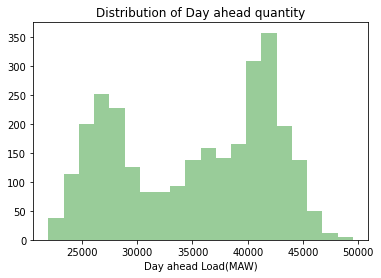

In [91]:
df_B0620_dist = sns.distplot(a=df_B0620["quantity"], hist=True, color="green", kde=False, rug=False, bins=20)
df_B0620_dist.set_xlabel("Day ahead Load(MAW)")
#vol_dist.set_ylabel("Net Imbalance Volume(MAW)"
df_B0620_dist.set_title("Distribution of Day ahead quantity")

<AxesSubplot:xlabel='Hour'>

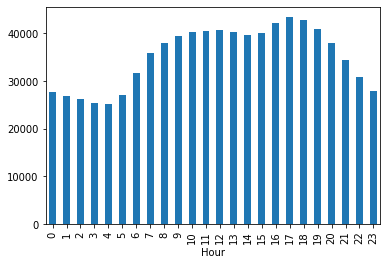

In [93]:
df_B0620.groupby('Hour')['quantity'].mean().plot.bar()

In [94]:
import plotly.express as px

#df = px.data.stocks()

#date_time
#scatter time 
fig3 = px.line(df_B1430, x= 'local_datetime', y= 'quantity')
#fig2 = px.line(df_B1780_EDA, x= 'local_datetime',y='imbalanceQuantityMAW')
fig3.show()

In [95]:
# Imbalance Prices
df_B1770 = client.get_B1770(start_date, end_date)
df_B1770.head()

B1770: 100%|██████████| 2879/2879 [09:37<00:00,  4.99it/s]


,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,documentType,processType,activeFlag,docStatus,documentID,documentRevNum
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22437930,1
1,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,1,50.9,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22437930,1
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438072,1
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438072,1
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,ELX-EMFIP-IMBP-22438191,1


In [100]:
df_B1430_join = df_B1430[["local_datetime","quantity"]]
#df_B1430_join(columns = {'quantity':'dayaheadgen_forcasts'}, inplace = True)

In [103]:
#df_B1430_join(columns = {'quantity':'dayaheadgen_forcasts'}, inplace = True)
df_B1430_join.columns = df_B1430_join.columns.str.replace('quantity', 'dayaheadgen_forcasts')

,local_datetime,dayaheadgen_forcasts
0,2020-01-01 00:00:00+00:00,24897
1,2020-01-01 00:30:00+00:00,24701
2,2020-01-01 01:00:00+00:00,24307
3,2020-01-01 01:30:00+00:00,23833
4,2020-01-01 02:00:00+00:00,23557


In [97]:
#todofordatarocessingandfeaturengieering
#feature engineering required for imbalance prices snd imbalance volume
#date:timebreakdown: day,month,type of day(Mon-Sunday),weekend or weekdays
#addthefollwoing: Solar,wind generation(forcasts vs actual generation)
#sine and cosine transformation for the timeframes
#lag varaible per day
#category: pricecategory(2 different dataframes)
#add weather data(later)
#df_B1780_EDA.head()
df_B1430.head()

,local_datetime,documentType,businessType,processType,timeSeriesID,quantity,curveType,resolution,settlementDate,settlementPeriod,activeFlag,documentID,documentRevNum,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
0,2020-01-01 00:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24897,Sequential fixed size block,PT30M,2020-01-01,1,Y,NGET-EMFIP-DAG-00035703,1,00:00:00,2020,1,2,0,0,Weekday
1,2020-01-01 00:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24701,Sequential fixed size block,PT30M,2020-01-01,2,Y,NGET-EMFIP-DAG-00035703,1,00:30:00,2020,1,2,0,30,Weekday
2,2020-01-01 01:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,24307,Sequential fixed size block,PT30M,2020-01-01,3,Y,NGET-EMFIP-DAG-00035703,1,01:00:00,2020,1,2,1,0,Weekday
3,2020-01-01 01:30:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23833,Sequential fixed size block,PT30M,2020-01-01,4,Y,NGET-EMFIP-DAG-00035703,1,01:30:00,2020,1,2,1,30,Weekday
4,2020-01-01 02:00:00+00:00,Generation forecast,Production,Day Ahead,NGET-EMFIP-DAG-TS-00036023,23557,Sequential fixed size block,PT30M,2020-01-01,5,Y,NGET-EMFIP-DAG-00035703,1,02:00:00,2020,1,2,2,0,Weekday


In [14]:
#check for nas no nas in the whole table 
#df_B1770.isna().sum()
#numerical varaibles 
df_B1770['imbalancePriceAmountGBP'] = df_B1770['imbalancePriceAmountGBP'].astype('float')
df_B1770['imbalancePriceAmountGBP'] = df_B1770['imbalancePriceAmountGBP'].round(decimals = 2)
df_B1770['settlementPeriod'] = df_B1770['settlementPeriod'].astype('category')

In [15]:
#datetime, extract the settlement times which are every 30 mins 
#weekday 0=mon, > end
#df_B1770.info()
#false = weekday, true = weeekend
import datetime as dt
df_B1770['local_time'] = pd.to_datetime(df_B1770['local_datetime'], format='%H%M').dt.time
df_B1770 ['Year'] = df_B1770.local_datetime.dt.year
df_B1770 ['Month'] = df_B1770.local_datetime.dt.month
df_B1770 ['weekday'] = df_B1770.local_datetime.dt.weekday
df_B1770 ['Hour'] = df_B1770.local_datetime.dt.hour
df_B1770 ['Minute'] = df_B1770.local_datetime.dt.minute
df_B1770['typ_of_day'] = df_B1770.local_datetime.dt.weekday >=5
df_B1770.head()

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,docStatus,documentID,documentRevNum,local_time,Year,Month,weekday,Hour,Minute,typ_of_day
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,50.90,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22437930,1,00:00:00,2020,1,2,0,0,False
1,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,1,50.90,Excess balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22437930,1,00:00:00,2020,1,2,0,0,False
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,2,0,30,False
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00,Excess balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,2,0,30,False
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,2,1,0,False


In [16]:
df_B1770['typ_of_day'] = df_B1770['typ_of_day'].astype('str')
df_B1770['typ_of_day'] = df_B1770['typ_of_day'].astype('category')
df_B1770['typ_of_day'].cat.rename_categories({'False':'Weekday', 'True': 'Weekend'}, inplace=True)
df_B1770['typ_of_day'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\643308533.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df_B1770['typ_of_day'].cat.rename_categories({'False':'Weekday', 'True': 'Weekend'}, inplace=True)


['Weekday', 'Weekend']
Categories (2, object): ['Weekday', 'Weekend']

In [129]:
#divide too two new columns per price category
#df_B1770.shape[0]
df_B1770_Insufficient_balance= df_B1770.loc[df_B1770['priceCategory']=='Insufficient balance']
df_B1770_Excess_balance= df_B1770.loc[df_B1770['priceCategory']=='Excess balance']

In [18]:
#lag variable
df_B1770_Insufficient_balance['Lag_1']= df_B1770_Insufficient_balance['imbalancePriceAmountGBP'].shift(1)
df_B1770_Excess_balance['Lag_1']= df_B1770_Excess_balance['imbalancePriceAmountGBP'].shift(1)
df_B1770_Excess_balance['hour_sin']  = np.sin(2*np.pi*df_B1770_Excess_balance['Hour']/23.0)
df_B1770_Excess_balance['hour_cos']  = np.cos(2*np.pi*df_B1770_Excess_balance['Hour']/23.0)
df_B1770_Insufficient_balance['hour_sin']  = np.sin(2*np.pi*df_B1770_Insufficient_balance['Hour']/23.0)
df_B1770_Insufficient_balance['hour_cos']  = np.cos(2*np.pi*df_B1770_Insufficient_balance['Hour']/23.0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\3150349083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B1770_Insufficient_balance['Lag_1']= df_B1770_Insufficient_balance['imbalancePriceAmountGBP'].shift(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\3150349083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B1770_Excess_balance['Lag_1']= df_B1770_Excess_balance['imbalancePriceAmountGBP'].shift(1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22752\3150349083.py:4: SettingWithCopyWarn

In [19]:
df_B1770_Insufficient_balance_EDA = df_B1770_Insufficient_balance[["imbalancePriceAmountGBP", "settlementPeriod","priceCategory","local_datetime"]]

In [109]:
df_B1440_solar_join = df_B1440_solar[["local_datetime","quantity"]]
df_B1440_solar_join.columns = df_B1440_solar_join.columns.str.replace('quantity', 'solargen_forcasts')
df_B1440_solar_join.head()

,local_datetime,solargen_forcasts
0,2020-01-01 00:00:00+00:00,0.0
3,2020-01-01 00:30:00+00:00,0.0
6,2020-01-01 01:00:00+00:00,0.0
9,2020-01-01 01:30:00+00:00,0.0
12,2020-01-01 02:00:00+00:00,0.0


In [116]:
df_B1440_wind_groupby_fin = df_B1440_wind.groupby('local_datetime')['quantity'].sum().reset_index()
df_B1440_wind_groupby_fin.head()

,local_datetime,quantity
0,2020-01-01 00:00:00+00:00,5867.419
1,2020-01-01 00:30:00+00:00,5867.419
2,2020-01-01 01:00:00+00:00,5633.187
3,2020-01-01 01:30:00+00:00,5633.187
4,2020-01-01 02:00:00+00:00,5460.596


In [117]:
df_B1440_wind_groupby_fin.columns = df_B1440_wind_groupby_fin.columns.str.replace('quantity', 'windgen_forcasts')

In [118]:
df_B1440_wind_groupby_fin.head()

,local_datetime,windgen_forcasts
0,2020-01-01 00:00:00+00:00,5867.419
1,2020-01-01 00:30:00+00:00,5867.419
2,2020-01-01 01:00:00+00:00,5633.187
3,2020-01-01 01:30:00+00:00,5633.187
4,2020-01-01 02:00:00+00:00,5460.596


In [122]:
df_B0620_fin = df_B0620[["local_datetime","quantity"]]
df_B0620_fin.columns = df_B0620_fin.columns.str.replace('quantity', 'demandload_forcasts')
df_B0620_fin.head()

,local_datetime,demandload_forcasts
0,2020-01-01 00:00:00+00:00,27684
1,2020-01-01 00:30:00+00:00,28315
2,2020-01-01 01:00:00+00:00,27745
3,2020-01-01 01:30:00+00:00,26773
4,2020-01-01 02:00:00+00:00,26099


In [130]:
df_B1770_Insufficient_balance = df_B1770_Insufficient_balance[["local_datetime","imbalancePriceAmountGBP"]]
df_B1770_Excess_balance = df_B1770_Excess_balance[["local_datetime","imbalancePriceAmountGBP"]]

df_B1770_Insufficient_balance.head()
df_B1770_Excess_balance.head()

,local_datetime,imbalancePriceAmountGBP
1,2020-01-01 00:00:00+00:00,50.9
3,2020-01-01 00:30:00+00:00,51
5,2020-01-01 01:00:00+00:00,29.37006
7,2020-01-01 01:30:00+00:00,28.52
9,2020-01-01 02:00:00+00:00,25.78


In [131]:
df_B1770_Insufficient_balance.columns = df_B1770_Insufficient_balance.columns.str.replace('imbalancePriceAmountGBP', 'imbalancePriceAmountGBP_insuff')
df_B1770_Excess_balance.columns = df_B1770_Excess_balance.columns.str.replace('imbalancePriceAmountGBP', 'imbalancePriceAmountGBP_excess')

In [107]:
#Joingdataframes - done
#get the imbalance volume as the base dataframe -done
#join on datetime - done
#join solar generation(rename qunaity as solar generation) - done
#join wind generation(rename quanity as wind generation)  - done
#load data - done
#join prices(imbalance volumes)
#day ahead (total proudction)
df_aggregated = pd.merge(df_B1780_EDA,df_B1430_join, on='local_datetime', how='inner')
df_aggregated.head()



,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,Minute,typ_of_day,hour_sin,hour_cos,dayaheadgen_forcasts
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,0,Weekday,0.000000,1.000000,24897
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,30,Weekday,0.000000,1.000000,24701
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,0,Weekday,0.269797,0.962917,24307
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,30,Weekday,0.269797,0.962917,23833
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,0,Weekday,0.519584,0.854419,23557


In [110]:
df_aggregated_2 =pd.merge(df_aggregated,df_B1440_solar_join, on='local_datetime', how='inner')
df_aggregated_2.head()

,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,Minute,typ_of_day,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,0,Weekday,0.000000,1.000000,24897,0.0
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,30,Weekday,0.000000,1.000000,24701,0.0
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,0,Weekday,0.269797,0.962917,24307,0.0
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,30,Weekday,0.269797,0.962917,23833,0.0
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,0,Weekday,0.519584,0.854419,23557,0.0


In [119]:
df_aggregated_2 = pd.merge(df_aggregated_2,df_B1440_wind_groupby_fin, on='local_datetime', how='inner')


In [123]:
df_aggregated_2 = pd.merge(df_aggregated_2,df_B0620_fin, on='local_datetime', how='inner')

In [136]:
df_aggregated_fin_insufficient = pd.merge(df_aggregated_2,df_B1770_Insufficient_balance, on='local_datetime', how='inner')
df_aggregated_fin_excess = pd.merge(df_aggregated_2,df_B1770_Excess_balance, on='local_datetime', how='inner')
df_aggregated_fin_insufficient.head()
df_aggregated_fin_excess.head()

,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,Minute,typ_of_day,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_excess
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,0,Weekday,0.000000,1.000000,24897,0.0,5867.419,27684,50.9
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,30,Weekday,0.000000,1.000000,24701,0.0,5867.419,28315,51
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,0,Weekday,0.269797,0.962917,24307,0.0,5633.187,27745,29.37006
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,30,Weekday,0.269797,0.962917,23833,0.0,5633.187,26773,28.52
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,0,Weekday,0.519584,0.854419,23557,0.0,5460.596,26099,25.78


In [138]:
#EDA and processing.
#pairplot between numerical variables .
#check the datatypes.
#describe to see the statistics for each section.
# compare relationhsip of the imbalance and the other numerical variables 
#for insufficient and excess volumes
#df_aggregated_fin_insufficient.info()
df_aggregated_fin_insufficient['imbalancePriceAmountGBP_insuff'] = df_aggregated_fin_insufficient['imbalancePriceAmountGBP_insuff'].astype('float')
df_aggregated_fin_excess['imbalancePriceAmountGBP_excess'] = df_aggregated_fin_excess['imbalancePriceAmountGBP_excess'].astype('float')

In [139]:
#EDA and processing.
#pairplot between numerical variables .
#check the datatypes.
#describe to see the statistics for each section.
# compare relationhsip of the imbalance and the other numerical variables 
#for insufficient and excess volumes
#coor plot
#df_aggregated_fin_insufficient.info()
df_aggregated_fin_insufficient.describe()

,imbalanceQuantityMAW,Lag_1,Year,Month,weekday,Hour,Minute,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff
count,6477.000000,6476.000000,6477.0,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000
mean,97.398609,100.603962,2020.0,1.483094,3.032422,13.921723,14.993052,-0.214144,-0.048372,35691.181566,649.580824,30336.320565,37068.714528,35.591369
std,362.383108,362.335288,0.0,0.499753,1.957753,6.120538,15.001156,0.648191,0.729244,5820.847376,1159.853062,14059.132499,6207.390962,21.213532
min,-1326.150000,-1326.150000,2020.0,1.000000,0.000000,0.000000,0.000000,-0.997669,-0.990686,17868.000000,0.000000,2585.990000,21965.000000,-66.250000
25%,-120.660000,-118.480000,2020.0,1.000000,1.000000,10.000000,0.000000,-0.816970,-0.775711,31352.000000,0.000000,18046.491000,32168.000000,16.530000
50%,87.350000,88.780000,2020.0,1.000000,3.000000,14.000000,0.000000,-0.398401,-0.068242,36590.000000,0.000000,30944.710000,38895.000000,43.800000
75%,310.340000,311.515000,2020.0,2.000000,5.000000,19.000000,30.000000,0.269797,0.682553,40494.000000,803.000000,43972.105000,41930.000000,49.500000
max,2000.970000,2000.970000,2020.0,2.000000,6.000000,23.000000,30.000000,0.997669,1.000000,49178.000000,5721.000000,51660.332000,49504.000000,150.000000


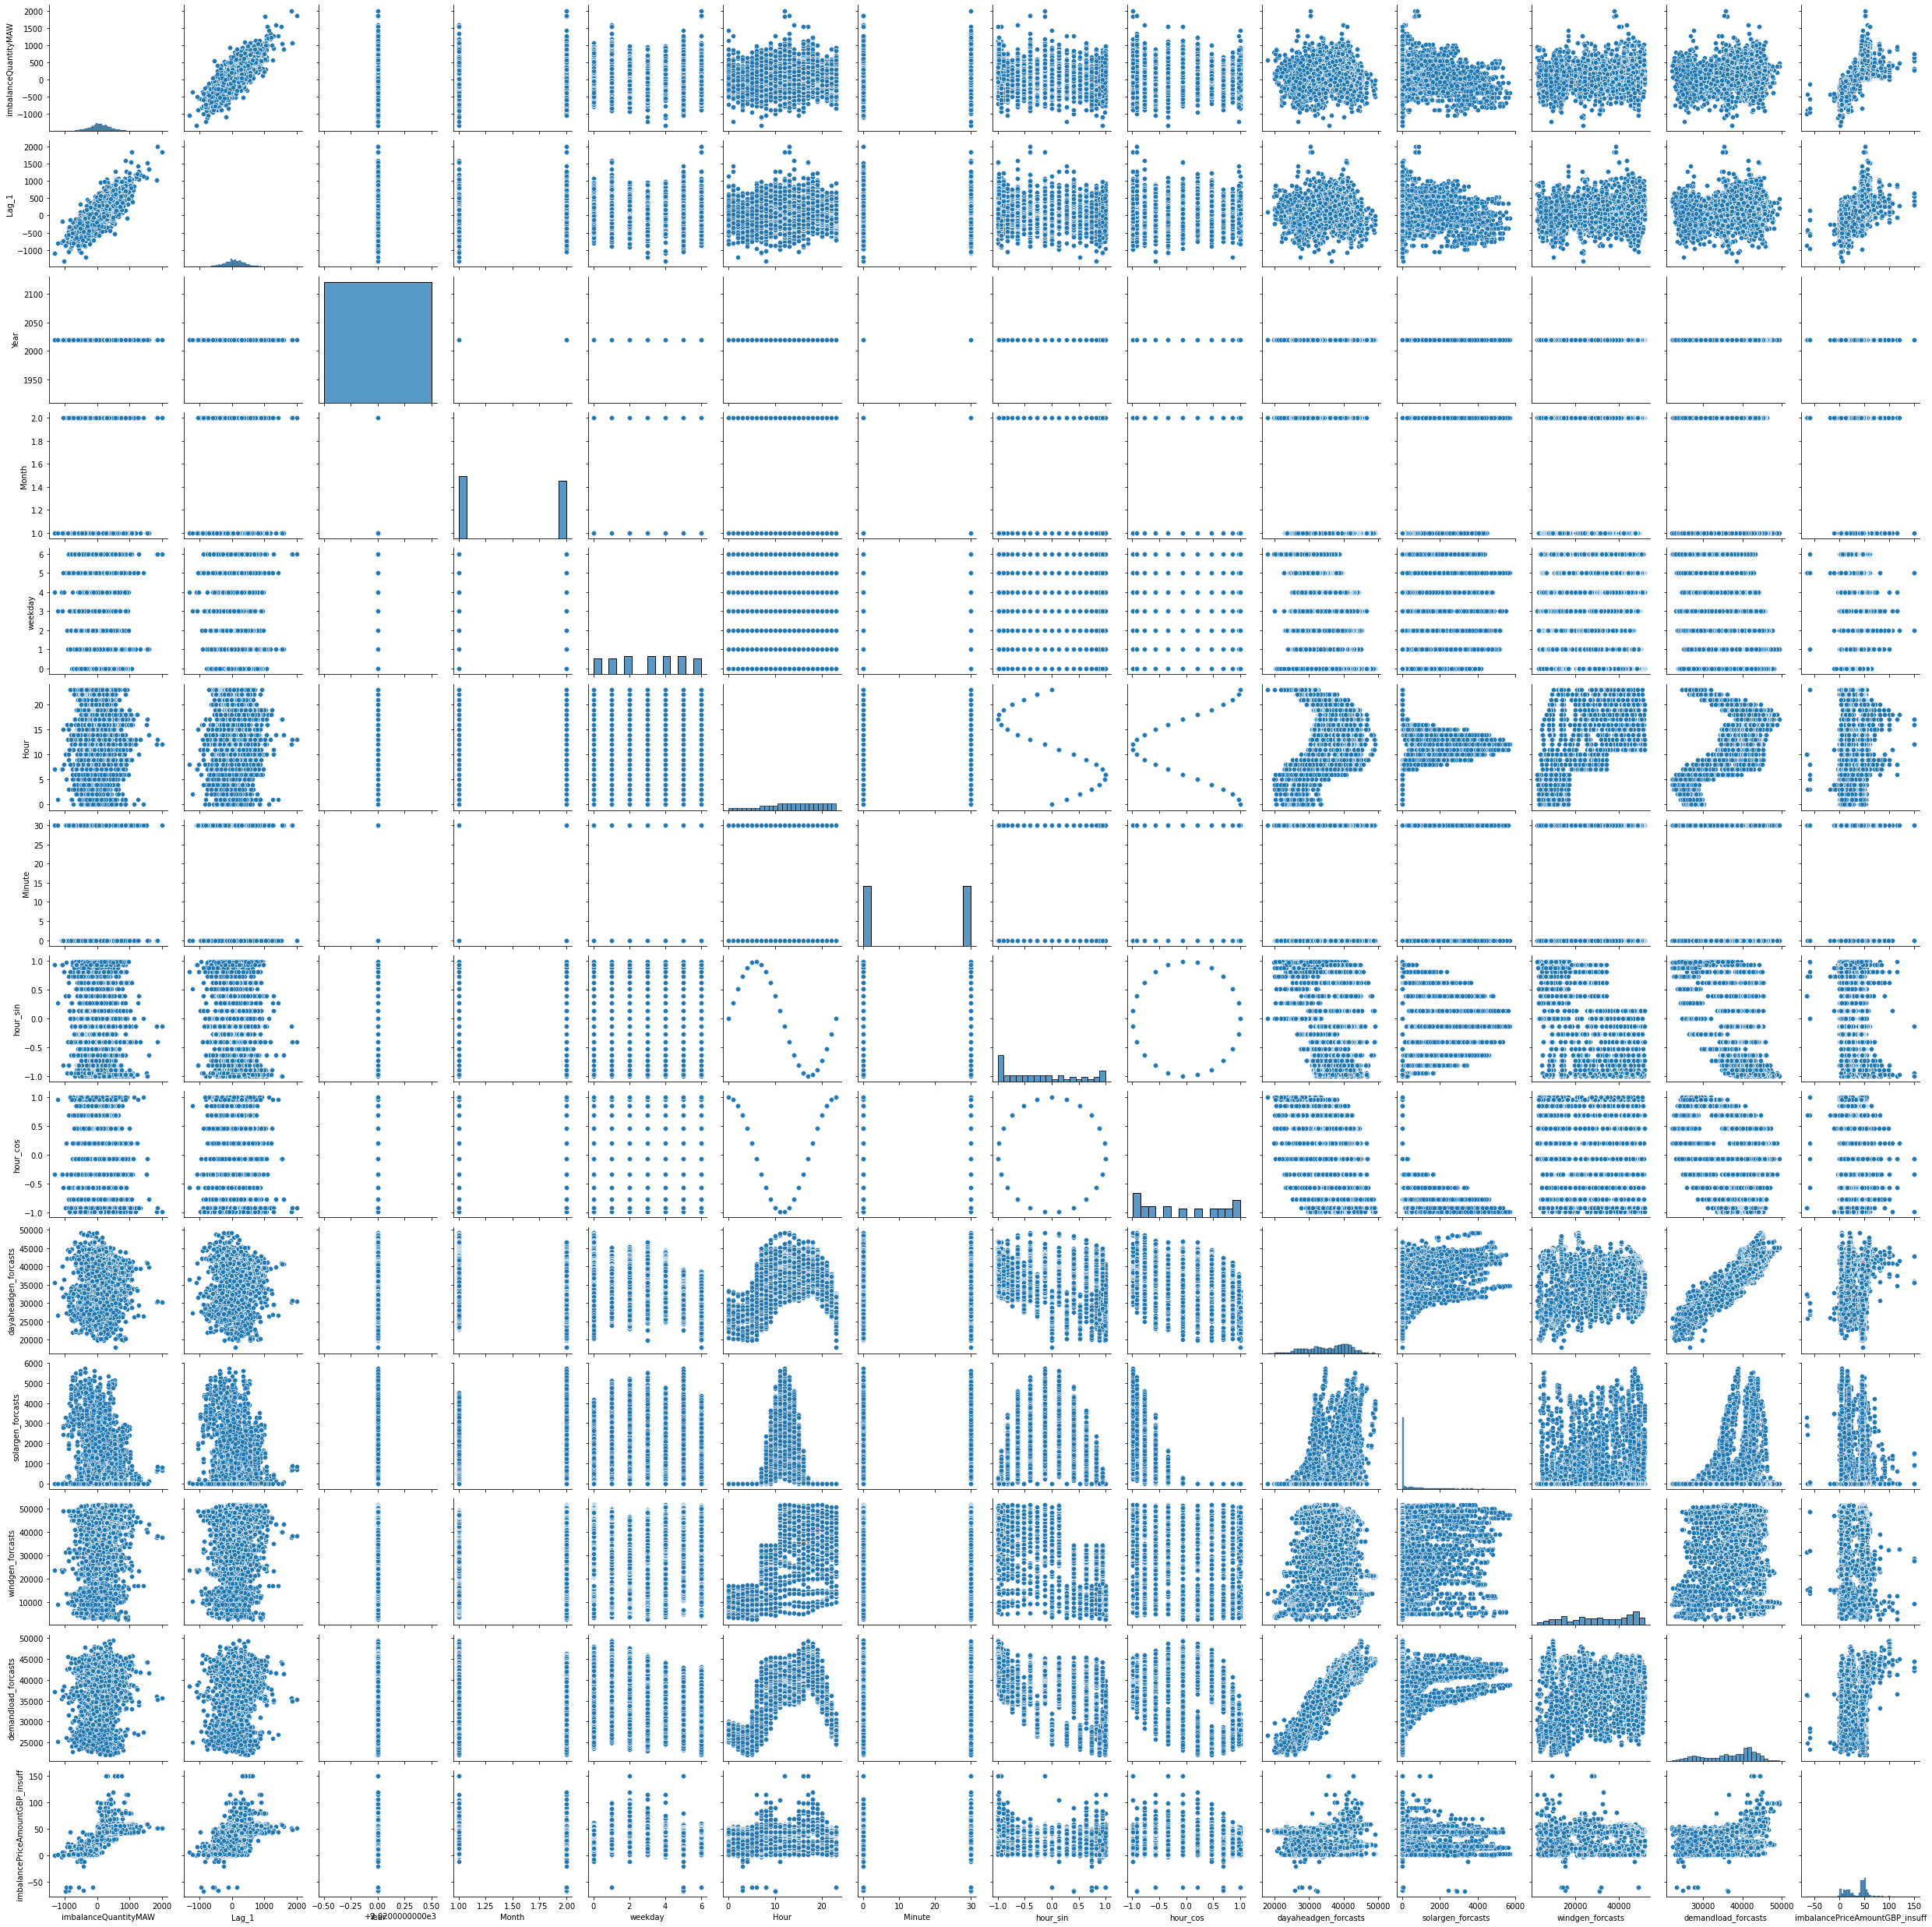

In [141]:
sns.pairplot(df_aggregated_fin_insufficient)

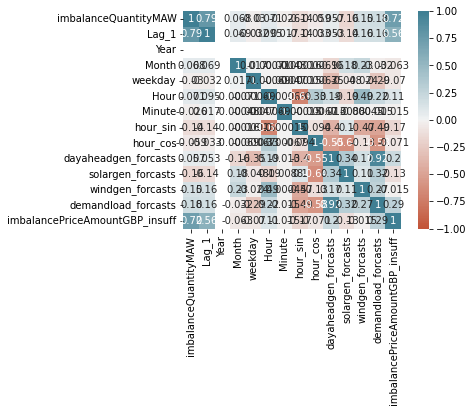

In [142]:
correlation = df_aggregated_fin_insufficient.corr(method='pearson')

ax = sns.heatmap(
    correlation, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
#process data

In [84]:
# df_B1770_Insufficient_balance['hour_sin']  = np.sin(2*np.pi*df_B1770_Insufficient_balance['Hour']/23.0)
# df_B1770_Insufficient_balance['hour_cos']  = np.cos(2*np.pi*df_B1770_Insufficient_balance['Hour']/23.0)

df_B1770_Excess_balance['hour_sin']  = np.sin(2*np.pi*df_B1770_Excess_balance['Hour']/23.0)
df_B1770_Excess_balance['hour_cos']  = np.cos(2*np.pi*df_B1770_Excess_balance['Hour']/23.0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11952\1168265186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B1770_Excess_balance['hour_sin']  = np.sin(2*np.pi*df_B1770_Excess_balance['Hour']/23.0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11952\1168265186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B1770_Excess_balance['hour_cos']  = np.cos(2*np.pi*df_B1770_Excess_balance['Hour']/23.0)


In [71]:
df_B1770_Insufficient_balance.head()
df_B1770_Excess_balance.head()

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,local_time,Year,Month,weekday,Hour,Minute,typ_of_day,Lag_1,hour_sin,hour_cos
0,2020-01-01 00:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,1,50.90000,Insufficient balance,Sequential fixed size block,PT30M,...,00:00:00,2020,1,2,0,0,False,NaN,0.000000,1.000000
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,...,00:30:00,2020,1,2,0,30,False,50.90000,0.000000,1.000000
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,...,01:00:00,2020,1,2,1,0,False,51.00000,0.269797,0.962917
6,2020-01-01 01:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,...,01:30:00,2020,1,2,1,30,False,29.37006,0.269797,0.962917
8,2020-01-01 02:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,5,25.78000,Insufficient balance,Sequential fixed size block,PT30M,...,02:00:00,2020,1,2,2,0,False,28.52000,0.519584,0.854419


In [145]:
#pre processing after EDA.
#label encoding for the binary categorical variables.
#dummmy variables for categorical variables more than one.

#2 decimal places for all the quantity.
#might standardise the data to make sure they are the same scale(might not need to do so in my case).


#after initial modelling(Linear and Lasso)
#do a correlation to check to remove any variables that are correlated.
#carry out PCA initially at end of process.
#feature engineering: ratio(percentage) of generation that is renewable.

#lable encoding:
# # Set up the LabelEncoder object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_aggregated_fin_insufficient["type_of_day"]=le.fit_transform(df_aggregated_fin_insufficient["typ_of_day"])
df_aggregated_fin_insufficient["imbalance_quantity_direction"]=le.fit_transform(df_aggregated_fin_insufficient["imbalanceQuantityDirection"])
df_aggregated_fin_insufficient.head()

#
# Apply the encoding to the "Accessible" column
# Compare the two columns

#print(hiking[["Accessible_enc","Accessible"]].head())

#windgen_forcasts and imbalancePriceAmountGBP_insuff make 2 decimal places.



,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,...,typ_of_day,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff,type_of_day,imbalance_quantity_direction
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,...,Weekday,0.000000,1.000000,24897,0.0,5867.419,27684,50.90000,0,1
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,...,Weekday,0.000000,1.000000,24701,0.0,5867.419,28315,51.00000,0,1
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,...,Weekday,0.269797,0.962917,24307,0.0,5633.187,27745,29.37006,0,0
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,...,Weekday,0.269797,0.962917,23833,0.0,5633.187,26773,28.52000,0,0
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,...,Weekday,0.519584,0.854419,23557,0.0,5460.596,26099,25.78000,0,0


In [151]:
df_aggregated_fin_insufficient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype                        
---  ------                          --------------  -----                        
 0   imbalanceQuantityMAW            6477 non-null   float64                      
 1   Lag_1                           6476 non-null   float64                      
 2   settlementPeriod                6477 non-null   category                     
 3   imbalanceQuantityDirection      6477 non-null   category                     
 4   local_datetime                  6477 non-null   datetime64[ns, Europe/London]
 5   local_time                      6477 non-null   object                       
 6   Year                            6477 non-null   int64                        
 7   Month                           6477 non-null   int64                        
 8   weekday                         6477 non-null   int64     

In [154]:
#Linear Regression

#check hour, minute, day and  to potetially make them dummy varaibles or add a sine/cosine effect
#2 decimal places for all the quantity.
df_aggregated_fin_insufficient['imbalancePriceAmountGBP_insuff'] = df_aggregated_fin_insufficient['imbalancePriceAmountGBP_insuff'].round(decimals = 2)
df_aggregated_fin_insufficient['weekday']  = df_aggregated_fin_insufficient['weekday'].astype('category')
df_aggregated_fin_insufficient['type_of_day']  = df_aggregated_fin_insufficient['type_of_day'].astype('category')
df_aggregated_fin_insufficient['imbalance_quantity_direction']  = df_aggregated_fin_insufficient['imbalance_quantity_direction'].astype('category')
df_aggregated_fin_insufficient['month_sin']  = np.sin(2*np.pi*df_aggregated_fin_insufficient['Month']/12.0)
df_aggregated_fin_insufficient['month_cos']  = np.cos(2*np.pi*df_aggregated_fin_insufficient['Month']/12.0)

df_aggregated_fin_insufficient.head()
#insufficent data
#get r2,RMSE, MAPE
#run model with the dependent variable as imbalance volume - Model 1
#run model with the dependent varaibles as imbalance price.
##run model with the dependent varaibles lag imbalance price.
#use training for 6 weeks with test data of 2 weeks - Done

#repeat this with stanadrsisde data
#might standardise the data to make sure they are the same scale(might not need to do so in my case).
#scale the indepenedent variables(numeric)



,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,...,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff,type_of_day,imbalance_quantity_direction,month_sin,month_cos
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,...,1.000000,24897,0.0,5867.419,27684,50.90,0,1,0.5,0.866025
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,...,1.000000,24701,0.0,5867.419,28315,51.00,0,1,0.5,0.866025
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,...,0.962917,24307,0.0,5633.187,27745,29.37,0,0,0.5,0.866025
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,...,0.962917,23833,0.0,5633.187,26773,28.52,0,0,0.5,0.866025
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,...,0.854419,23557,0.0,5460.596,26099,25.78,0,0,0.5,0.866025


In [179]:
#df_imbalance_price_training = pd.get_dummies(df_B1770_training, columns=["businessType", "activeFlag","documentType","processType","docStatus","curveType","priceCategory" ], drop_first=True)
df_aggregated_final_insufficient = df_aggregated_fin_insufficient

In [183]:
df_aggregated_fin_insufficient_training = df_aggregated_fin_insufficient[(df_aggregated_fin_insufficient['local_datetime'] > '2020-01-01 00:00:00') & (df_aggregated_fin_insufficient['local_datetime'] <= '2020-02-12 11:30:00')]
df_aggregated_fin_insufficient_testing = df_aggregated_fin_insufficient[(df_aggregated_fin_insufficient['local_datetime'] > '2020-02-12 12:00:00') & (df_aggregated_fin_insufficient['local_datetime'] <= '2020-02-29 23:30:00')]

In [184]:
df_aggregated_fin_insufficient_training = df_aggregated_fin_insufficient_training[["imbalanceQuantityMAW", "settlementPeriod", "Year", "hour_sin", "hour_cos","dayaheadgen_forcasts", "solargen_forcasts", "windgen_forcasts", "demandload_forcasts", "imbalancePriceAmountGBP_insuff", "type_of_day", "month_sin", "month_cos", "imbalance_quantity_direction"]]
df_aggregated_fin_insufficient_testing = df_aggregated_fin_insufficient_testing[["imbalanceQuantityMAW", "settlementPeriod", "Year", "hour_sin", "hour_cos","dayaheadgen_forcasts", "solargen_forcasts", "windgen_forcasts", "demandload_forcasts", "imbalancePriceAmountGBP_insuff", "type_of_day", "month_sin", "month_cos", "imbalance_quantity_direction"]]

In [185]:
df_aggregated_fin_insufficient_training= pd.get_dummies(df_aggregated_fin_insufficient_training, columns=["settlementPeriod"], drop_first=True)
df_aggregated_fin_insufficient_testing= pd.get_dummies(df_aggregated_fin_insufficient_testing, columns=["settlementPeriod"], drop_first=True)

In [199]:
#df_aggregated_fin_insufficient_training.info()
#imbalancePriceAmountGBP_insuff
df_aggregated_fin_insufficient_training['Lag_1_GBP']= df_aggregated_fin_insufficient_training['imbalancePriceAmountGBP_insuff'].shift(1)
df_aggregated_fin_insufficient_testing['Lag_1_GBP']= df_aggregated_fin_insufficient_testing['imbalancePriceAmountGBP_insuff'].shift(1)

In [204]:
df_aggregated_fin_insufficient_training.describe()

,imbalanceQuantityMAW,Year,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff,month_sin,...,settlementPeriod_45,settlementPeriod_46,settlementPeriod_47,settlementPeriod_48,settlementPeriod_5,settlementPeriod_6,settlementPeriod_7,settlementPeriod_8,settlementPeriod_9,Lag_1_GBP
count,4571.000000,4571.0,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,...,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4570.000000
mean,87.515959,2020.0,-0.207868,-0.049526,36013.169547,580.171079,28199.650751,37031.102166,36.003640,0.598012,...,0.027565,0.027565,0.027565,0.027565,0.009407,0.009407,0.009407,0.009407,0.009407,36.008532
std,363.317276,0.0,0.650002,0.729414,5874.130200,1085.403513,13891.067421,6292.737932,22.215928,0.162094,...,0.163741,0.163741,0.163741,0.163741,0.096544,0.096544,0.096544,0.096544,0.096544,22.215898
min,-1326.150000,2020.0,-0.997669,-0.990686,19826.000000,0.000000,2585.990000,21965.000000,-66.250000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.250000
25%,-143.030000,2020.0,-0.816970,-0.775711,31643.000000,0.000000,14853.391000,32078.500000,16.340000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.380000
50%,71.520000,2020.0,-0.269797,-0.068242,36780.000000,0.000000,28333.663000,38918.000000,45.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,302.890000,2020.0,0.269797,0.682553,40994.000000,678.500000,41158.738000,41825.000000,50.000000,0.866025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
max,2000.970000,2020.0,0.997669,1.000000,49178.000000,5525.000000,51660.332000,49504.000000,150.000000,0.866025,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000


In [205]:
#standarsisde model training
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaled_features_insufficient_training = df_aggregated_fin_insufficient_training.copy()
col_names = ['dayaheadgen_forcasts', 'solargen_forcasts','windgen_forcasts','demandload_forcasts', 'imbalancePriceAmountGBP_insuff']
features = scaled_features_insufficient_training[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features_insufficient_training[col_names] = features
scaled_features_insufficient_training.head()

,imbalanceQuantityMAW,Year,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff,type_of_day,...,settlementPeriod_45,settlementPeriod_46,settlementPeriod_47,settlementPeriod_48,settlementPeriod_5,settlementPeriod_6,settlementPeriod_7,settlementPeriod_8,settlementPeriod_9,Lag_1_GBP
1,194.71,2020,0.000000,1.000000,-1.925971,-0.53458,-1.607844,-1.385256,0.675101,0,...,0,0,0,0,0,0,0,0,0,NaN
2,-71.43,2020,0.269797,0.962917,-1.993053,-0.53458,-1.624708,-1.475847,-0.298631,0,...,0,0,0,0,0,0,0,0,0,51.00
3,-122.23,2020,0.269797,0.962917,-2.073754,-0.53458,-1.624708,-1.630328,-0.336896,0,...,0,0,0,0,0,0,0,0,0,29.37
4,-90.90,2020,0.519584,0.854419,-2.120745,-0.53458,-1.637134,-1.737447,-0.460244,0,...,0,0,0,0,1,0,0,0,0,28.52
5,-140.42,2020,0.519584,0.854419,-2.155137,-0.53458,-1.637134,-1.839798,-0.505712,0,...,0,0,0,0,0,1,0,0,0,25.78


In [206]:
#standarsisde model testing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaled_features_insufficient_testing = df_aggregated_fin_insufficient_testing.copy()
col_names = ['dayaheadgen_forcasts', 'solargen_forcasts','windgen_forcasts','demandload_forcasts', 'imbalancePriceAmountGBP_insuff']
features = scaled_features_insufficient_testing[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features_insufficient_testing[col_names] = features
scaled_features_insufficient_testing.head()

,imbalanceQuantityMAW,Year,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff,type_of_day,...,settlementPeriod_45,settlementPeriod_46,settlementPeriod_47,settlementPeriod_48,settlementPeriod_5,settlementPeriod_6,settlementPeriod_7,settlementPeriod_8,settlementPeriod_9,Lag_1_GBP
4575,-197.40,2020,-0.136167,-0.990686,1.329445,2.526954,0.792668,1.112501,-0.624060,0,...,0,0,0,0,0,0,0,0,0,NaN
4576,-197.40,2020,-0.136167,-0.990686,1.329445,3.063960,0.792668,1.112501,-0.624060,0,...,0,0,0,0,0,0,0,0,0,23.08
4577,-197.40,2020,-0.136167,-0.990686,1.329445,2.996930,0.792668,1.112501,-0.624060,0,...,0,0,0,0,0,0,0,0,0,23.08
4578,-261.96,2020,-0.398401,-0.917211,1.341747,2.183333,0.680828,1.039921,-1.135699,0,...,0,0,0,0,0,0,0,0,0,23.08
4579,-261.96,2020,-0.398401,-0.917211,1.341747,2.748074,0.680828,1.039921,-1.135699,0,...,0,0,0,0,0,0,0,0,0,13.60


In [212]:
X_Train =scaled_features_insufficient_training.drop(columns=['imbalancePriceAmountGBP_insuff','Lag_1_GBP'])
#X_Train.dropna(inplace=True)
y_Train = scaled_features_insufficient_training[['imbalancePriceAmountGBP_insuff']]
X_Test =scaled_features_insufficient_testing.drop(columns=['imbalancePriceAmountGBP_insuff', 'Lag_1_GBP'])
#X_Test.dropna(inplace=True)
y_test =scaled_features_insufficient_testing[['imbalancePriceAmountGBP_insuff']]

In [211]:
y_Train.head()

,imbalancePriceAmountGBP_insuff
1,0.675101
2,-0.298631
3,-0.336896
4,-0.460244
5,-0.505712


In [213]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
model_2 = sm.OLS(y_Train, X_Train).fit()
model_2.summary()
#standarsided model with imbalance volume
#good R2 much better performance with more variables that reject null hyppothesis hence statistical
#releveant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     imbalancePriceAmountGBP_insuff   R-squared:                       0.800
Model:                                        OLS   Adj. R-squared:                  0.798
Method:                             Least Squares   F-statistic:                     328.5
Date:                            Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                                    15:57:20   Log-Likelihood:                -2806.9
No. Observations:                            4571   AIC:                             5726.
Df Residuals:                                4515   BIC:                             6086.
Df Model:                                      55                                         
Covariance Type:                        nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
imbalanceQuantityMAW             0.0005   2.97e-05     15.794      0.000       0.000       0.001
Year                            -0.0005   1.37e-05    -35.582      0.000      -0.001      -0.000
hour_sin                        -0.0841      0.023     -3.584      0.000      -0.130      -0.038
hour_cos                        -0.0207      0.053     -0.389      0.697      -0.125       0.084
dayaheadgen_forcasts            -0.1095      0.022     -5.027      0.000      -0.152      -0.067
solargen_forcasts               -0.0295      0.012     -2.465      0.014      -0.053      -0.006
windgen_forcasts                -0.2232      0.009    -26.026      0.000      -0.240      -0.206
demandload_forcasts              0.3385      0.031     11.087      0.000       0.279       0.398
type_of_day                      0.0233      0.022      1.066      0.286      -0.020       0.066
month_sin                       -0.2064      0.023     -8.830      0.000      -0.252      -0.161
month_cos                        0.2064      0.023      8.830      0.000       0.161       0.252
imbalance_quantity_direction     1.4254      0.021     68.599      0.000       1.385       1.466
settlementPeriod_10              0.0360      0.081      0.445      0.656      -0.122       0.194
settlementPeriod_11              0.0348      0.075      0.467      0.641      -0.111       0.181
settlementPeriod_12             -0.0879      0.074     -1.184      0.237      -0.233       0.058
settlementPeriod_13             -0.0140      0.069     -0.202      0.840      -0.150       0.122
settlementPeriod_14             -0.0727      0.070     -1.033      0.302      -0.211       0.065
settlementPeriod_15              0.0562      0.051      1.105      0.269      -0.044       0.156
settlementPeriod_16              0.0296      0.052      0.570      0.568      -0.072       0.131
settlementPeriod_17              0.0004      0.049      0.008      0.994      -0.096       0.097
settlementPeriod_18              0.0560      0.050      1.130      0.259      -0.041       0.153
settlementPeriod_19              0.0074      0.049      0.151      0.880      -0.089       0.104
settlementPeriod_2              -0.0710      0.098     -0.727      0.467      -0.262       0.120
settlementPeriod_20             -0.0044      0.049     -0.089      0.929      -0.101       0.093
settlementPeriod_21             -0.1699      0.051     -3.340      0.001      -0.270      -0.070
settlementPeriod_22             -0.1633      0.051     -3.186      0.001      -0.264      -0.063
settlementPeriod_23              0.1047      0.046      2.285      0.022       0.015       0.194
settlementPeriod_24             -0.0058  

In [214]:
from sklearn import metrics
predictions_2 = model_2.predict(X_Test)
print(metrics.mean_absolute_error(abs(y_test),abs(predictions_2)))
print(np.sqrt(metrics.mean_absolute_error(abs(y_test),abs(predictions_2))))
#rmse 0.51
#mse 0.2664

0.2664215663924746
0.5161604076180917


In [190]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
model_1 = sm.OLS(y_Train, X_Train).fit()
model_1.summary()
#X_Train.info()
#df_aggregated_fin_insufficient_training.info()
#good R2 much  with more variables that reject null hyppothesis hence statistical
#releveant

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     imbalanceQuantityMAW   R-squared:                       0.640
Model:                              OLS   Adj. R-squared:                  0.636
Method:                   Least Squares   F-statistic:                     146.1
Date:                  Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                          17:53:20   Log-Likelihood:                -31096.
No. Observations:                  4571   AIC:                         6.230e+04
Df Residuals:                      4515   BIC:                         6.266e+04
Df Model:                            55                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Year                              -0.3067      0.031     -9.846      0.000      -0.368      -0.246
hour_sin                          78.6549     11.387      6.908      0.000      56.332     100.978
hour_cos                          49.7885     25.895      1.923      0.055      -0.979     100.556
dayaheadgen_forcasts              -0.0142      0.002     -7.904      0.000      -0.018      -0.011
solargen_forcasts                 -0.0624      0.005    -11.788      0.000      -0.073      -0.052
windgen_forcasts                   0.0034      0.000     10.686      0.000       0.003       0.004
demandload_forcasts                0.0226      0.002      9.522      0.000       0.018       0.027
imbalancePriceAmountGBP_insuff     5.0198      0.318     15.794      0.000       4.397       5.643
type_of_day                       54.7696     10.632      5.151      0.000      33.925      75.614
month_sin                         76.8885     11.429      6.727      0.000      54.481      99.295
month_cos                        -76.8887     11.429     -6.727      0.000     -99.296     -54.482
imbalance_quantity_direction     316.5429     13.682     23.135      0.000     289.719     343.367
settlementPeriod_10                2.6424     39.363      0.067      0.946     -74.528      79.813
settlementPeriod_11              -24.7999     36.332     -0.683      0.495     -96.029      46.429
settlementPeriod_12              -41.8707     36.187     -1.157      0.247    -112.815      29.073
settlementPeriod_13              -14.8130     33.843     -0.438      0.662     -81.162      51.536
settlementPeriod_14              -38.7819     34.293     -1.131      0.258    -106.012      28.448
settlementPeriod_15             -160.1306     24.683     -6.487      0.000    -208.521    -111.740
settlementPeriod_16             -104.6566     25.241     -4.146      0.000    -154.142     -55.172
settlementPeriod_17             -102.4008     24.034     -4.261      0.000    -149.519     -55.282
settlementPeriod_18              -62.2035     24.145     -2.576      0.010    -109.539     -14.868
settlementPeriod_19              -51.5536     24.009     -2.147      0.032     -98.624      -4.483
settlementPeriod_2                24.3309     47.588      0.511      0.609     -68.964     117.626
settlementPeriod_20                6.7486     24.116      0.280      0.780     -40.530      54.027
settlementPeriod_21               67.2377     24.802      2.711      0.007      18.614     115.861
settlementPeriod_22               34.7766     25.002      1.391      0.164     -14.240      83.793
settlementPeriod_23               27.6952     22.334      1.240      0.215     -16.091      71.482
settlementPeriod_24               64.6970     22.446      2.882      0.004      20.692     

In [192]:
from sklearn import metrics
predictions_1 = model_1.predict(X_Test)

In [197]:
#predictions_1.tail(100)
#RMS:13.509
#MSE: 182.49
metrics.mean_absolute_error(abs(y_test),abs(predictions_1))
np.sqrt(metrics.mean_absolute_error(abs(y_test),abs(predictions_1)))

182.49447593504019

In [ ]:
#repeat this with stanadrsisde data
#might standardise the data to make sure they are the same scale(might not need to do so in my case).
#scale the indepenedent variables(numeric)

In [149]:
#Linear Regression

df_aggregated_fin_insufficient.

#check hour, minute, day and  to potetially make them dummy varaibles or add a sine/cosine effect
#2 decimal places for all the quantity.

#excess balance
#run model with the dependent variable as imbalance volume.
#run model with the dependent varaibles as imbalance price.
##run model with the dependent varaibles lag imbalance price.
#run step by step multivarainat for both imbalance volume, imbalance price, lag imbalance price
#use training for 6 weeks with test data of 2 weeks.

#repeat this with stanadrsisde data
#might standardise the data to make sure they are the same scale(might not need to do so in my case).
#scale the indepenedent variables(numeric)


,imbalanceQuantityMAW,Lag_1,settlementPeriod,imbalanceQuantityDirection,local_datetime,local_time,Year,Month,weekday,Hour,...,typ_of_day,hour_sin,hour_cos,dayaheadgen_forcasts,solargen_forcasts,windgen_forcasts,demandload_forcasts,imbalancePriceAmountGBP_insuff,type_of_day,imbalance_quantity_direction
0,54.34,NaN,1,SURPLUS,2020-01-01 00:00:00+00:00,00:00:00,2020,1,2,0,...,Weekday,0.000000,1.000000,24897,0.0,5867.419,27684,50.90000,0,1
1,194.71,54.34,2,SURPLUS,2020-01-01 00:30:00+00:00,00:30:00,2020,1,2,0,...,Weekday,0.000000,1.000000,24701,0.0,5867.419,28315,51.00000,0,1
2,-71.43,194.71,3,DEFICIT,2020-01-01 01:00:00+00:00,01:00:00,2020,1,2,1,...,Weekday,0.269797,0.962917,24307,0.0,5633.187,27745,29.37006,0,0
3,-122.23,-71.43,4,DEFICIT,2020-01-01 01:30:00+00:00,01:30:00,2020,1,2,1,...,Weekday,0.269797,0.962917,23833,0.0,5633.187,26773,28.52000,0,0
4,-90.90,-122.23,5,DEFICIT,2020-01-01 02:00:00+00:00,02:00:00,2020,1,2,2,...,Weekday,0.519584,0.854419,23557,0.0,5460.596,26099,25.78000,0,0


In [147]:
df_aggregated_fin_insufficient.info()

#potentially add day-ahead forcasts and forcasts for balancing rather the actual values.

#good methodology used here:

#file:///C:/Users/Admin/OneDrive/Desktop/esda_work/dissertation/energies-12-04557.pdf


# ss=StandardScaler()
# X_scaled=ss.fit_transform(X)




#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Fit the k-nearest neighbors model to the training data.

#knn.fit(X_train, y_train)

# Score the model on the test data.

#print(knn.score(X_test, y_test))
#drop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6477 entries, 0 to 6476
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype                        
---  ------                          --------------  -----                        
 0   imbalanceQuantityMAW            6477 non-null   float64                      
 1   Lag_1                           6476 non-null   float64                      
 2   settlementPeriod                6477 non-null   category                     
 3   imbalanceQuantityDirection      6477 non-null   category                     
 4   local_datetime                  6477 non-null   datetime64[ns, Europe/London]
 5   local_time                      6477 non-null   object                       
 6   Year                            6477 non-null   int64                        
 7   Month                           6477 non-null   int64                        
 8   weekday                         6477 non-null   int64     

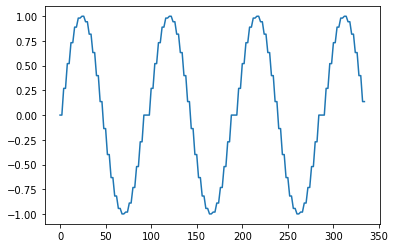

In [68]:
#check transfromation worked as required
sample = df_B1770_Insufficient_balance[0:168]
ax= sample['hour_sin'].plot()


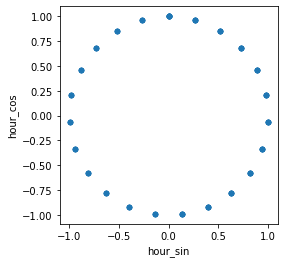

In [69]:
ax = sample.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

In [9]:
#to encode for month, day aswell
def encode(data, col, max_val):
    data[col + 'sin'] = np.sin(2*np.pi*data[col]/max_val)
    data[col + 'sin'] = np.cos(2*np.pi*data[col]/max_val)
    return data

In [ ]:
#todofordatarocessingandfeaturengieering
#feature engineering required for imbalance prices snd imbalance volume
#date:timebreakdown: day,month,type of day(Mon-Sunday),weekend or weekdays
#addthefollwoing: Solar,wind generation(forcasts vs actual generation)
#sine and cosine transformation for the timeframes
#lag varaible per day
#category: pricecategory(2 different dataframes)
#add weather data(later)


#EDA
#prices vs weekday(boxplot, bar plots)
#prices vs type of day(weekend/weekday)
#prices vs hour in the day(averageed for the week)
#prices vs renewable generation
#find lolp data

In [18]:
#https://plotly.com/python/time-series/
import plotly.express as px

df = px.data.stocks()

fig = px.line(df_B1770, x= 'local_time', y= 'imbalancePriceAmountGBP')
fig2 = px.line(df_B1770, x= 'local_datetime',y='imbalancePriceAmountGBP')
fig.show()

In [10]:
#Exploratory data analysis
#dist of imbalance prices
fig3 = px.histogram(df_B1770, x="imbalancePriceAmountGBP", nbins=20)
#fig3.show()

#price category variable 
#equally distrbuted, inufficeint and excess balance
fig4 = px.histogram(df_B1770, x="priceCategory")
#fig4.show()

#price category vs imbalance price

fig5 = px.scatter(df_B1770, x="settlementPeriod", y="imbalancePriceAmountGBP")
fig5.show()

#rom eda might need more variables, when access to imbalance data try and join on data to see the relationship between
#balance and prices
#add weather data aswell

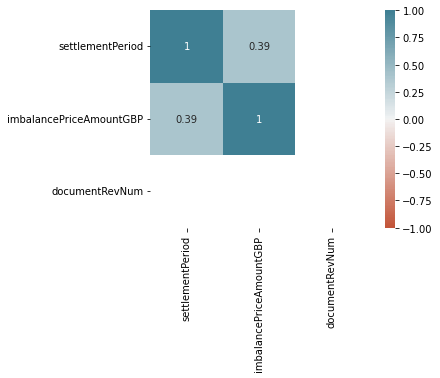

In [11]:
#settlement period vs imbalance price
correlation = df_B1770.corr(method='pearson')

ax = sns.heatmap(
    correlation, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

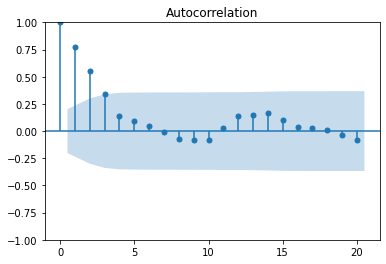

In [31]:
#prep data for forecasting
# df_B1770['day'] = df_B1770['local_datetime'].dt.day
# df_B1770['month'] = df_B1770['local_datetime'].dt.month
# df_B1770['year'] = df_B1770['local_datetime'].dt.year
# df_B1770['hour'] = df_B1770['local_datetime'].dt.hour
# df_B1770['minute'] = df_B1770['local_datetime'].dt.minute
# df_B1770.head(10)


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_B1770['imbalancePriceAmountGBP'])
plt.show()

In [ ]:
#featurescaling, label encoding and dummy variables.

In [19]:
#training and testing data
df_B1770_training = df_B1770[(df_B1770['local_datetime'] > '2020-01-01 00:00:00') & (df_B1770['local_datetime'] <= '2020-01-01 11:30:00')]
df_B1770_testing = df_B1770[(df_B1770['local_datetime'] > '2020-01-01 12:00:00') & (df_B1770['local_datetime'] <= '2020-01-01 23:00:00')]

In [23]:
#pre/processing a


df_B1770_training.head()



,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,activeFlag,docStatus,documentID,documentRevNum,local_time,Year,Month,Day,Hour,Minute
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Excess balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0
5,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Excess balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0
6,2020-01-01 01:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,...,Y,Final,ELX-EMFIP-IMBP-22438318,1,01:30:00,2020,1,1,1,30


In [20]:
#pre-processing #lag variables for the dependent variable price
df_B1770_training['Lag_1'] = df_B1770_training['imbalancePriceAmountGBP'].shift(1)
df_B1770_testing['Lag_1'] = df_B1770_testing['imbalancePriceAmountGBP'].shift(1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2428237418.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2428237418.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pre Processing - Pre data Modelling

In [ ]:
#pre processing after EDA.
#label encoding for the binary categorical variables.
#dummmy variables for categorical variables more than one.
#2 decimal places for all the quantity.
#featur engineering: ratio(percentage) of generation that is renewable.
#might standardise the data to make sure they are the same scale(might not need to do so in my case).
#remove any redudant variables.
#do a correlation to check to remove any variables that are correlated
#carry out PCA initially at end of process.

In [36]:
#cycical pre-processing for time.
df_B1770_training.head()

,local_datetime,timeSeriesID,businessType,controlArea,settlementDate,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,...,docStatus,documentID,documentRevNum,local_time,Year,Month,Day,Hour,Minute,Lag_1
2,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30,NaN
3,2020-01-01 00:30:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,2,51.00000,Excess balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438072,1,00:30:00,2020,1,1,0,30,51.00000
4,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0,51.00000
5,2020-01-01 01:00:00+00:00,ELX-EMFIP-IMBP-TS-2,Balance energy deviation,10YGB----------A,2020-01-01,3,29.37006,Excess balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438191,1,01:00:00,2020,1,1,1,0,29.37006
6,2020-01-01 01:30:00+00:00,ELX-EMFIP-IMBP-TS-1,Balance energy deviation,10YGB----------A,2020-01-01,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,...,Final,ELX-EMFIP-IMBP-22438318,1,01:30:00,2020,1,1,1,30,29.37006


In [38]:
#remove altenating rows in the dataframe if needed
# df_B1770_training = df_B1770_training.iloc[::2]
# df_B1770_testing =  df_B1770_testing.iloc[::2]

df_B1770_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 50 to 93
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   local_datetime           44 non-null     datetime64[ns, Europe/London]
 1   timeSeriesID             44 non-null     object                       
 2   businessType             44 non-null     category                     
 3   controlArea              44 non-null     object                       
 4   settlementDate           44 non-null     object                       
 5   settlementPeriod         44 non-null     int32                        
 6   imbalancePriceAmountGBP  44 non-null     float64                      
 7   priceCategory            44 non-null     category                     
 8   curveType                44 non-null     category                     
 9   resolution               44 non-null     object        

In [21]:
#select the variables for testing and training

#do note select local_datetime,timeSeriesID, controlAra, #settlement Date, # documentID 
df_B1770_training = df_B1770_training[["businessType", "settlementPeriod","imbalancePriceAmountGBP","priceCategory","curveType","resolution", "documentType", "processType", "activeFlag","docStatus", 
"documentRevNum", "local_time", "Year", "Month", "Day","Hour", "Minute", "Lag_1"]]

df_B1770_testing = df_B1770_testing[["businessType", "settlementPeriod","imbalancePriceAmountGBP","priceCategory","curveType","resolution", "documentType", "processType", "activeFlag","docStatus", 
"documentRevNum", "local_time", "Year", "Month", "Day","Hour", "Minute", "Lag_1"]]



In [41]:
df_B1770_training

,businessType,settlementPeriod,imbalancePriceAmountGBP,priceCategory,curveType,resolution,documentType,processType,activeFlag,docStatus,documentRevNum,local_time,Year,Month,Day,Hour,Minute,Lag_1
2,Balance energy deviation,2,51.00000,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,00:30:00,2020,1,1,0,30,NaN
3,Balance energy deviation,2,51.00000,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,00:30:00,2020,1,1,0,30,51.00000
4,Balance energy deviation,3,29.37006,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:00:00,2020,1,1,1,0,51.00000
5,Balance energy deviation,3,29.37006,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:00:00,2020,1,1,1,0,29.37006
6,Balance energy deviation,4,28.52000,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:30:00,2020,1,1,1,30,29.37006
7,Balance energy deviation,4,28.52000,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,01:30:00,2020,1,1,1,30,28.52000
8,Balance energy deviation,5,25.78000,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:00:00,2020,1,1,2,0,28.52000
9,Balance energy deviation,5,25.78000,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:00:00,2020,1,1,2,0,25.78000
10,Balance energy deviation,6,24.77018,Insufficient balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:30:00,2020,1,1,2,30,25.78000
11,Balance energy deviation,6,24.77018,Excess balance,Sequential fixed size block,PT30M,Imbalance prices,Realised,Y,Final,1,02:30:00,2020,1,1,2,30,24.77018


Standardise Data

In [ ]:
#https://machinelearningmastery.com/time-series-seasonality-with-python/#:~:text=A%20cycle%20structure%20in%20a,and%20is%20called%20a%20cycle.

#https://builtin.com/data-science/when-and-why-standardize-your-data

#https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#prep data for basic linear regression forcasting test on all data no train test split
#make catvariables dummmy vaiables 
#statsmodels pacakage in pandas.

#might need to change all the categories to just an object or numberical value depending on type of column

df_imbalance_price_training = pd.get_dummies(df_B1770_training, columns=["businessType", "activeFlag","documentType","processType","docStatus","curveType","priceCategory" ], drop_first=True)
df_imbalance_price_testing = pd.get_dummies(df_B1770_testing, columns=["businessType", "activeFlag","documentType","processType","docStatus","curveType","priceCategory" ], drop_first=True)

In [23]:
X_Train =df_imbalance_price_training.drop(columns=['Lag_1'])
y_Train = df_imbalance_price_training[['Lag_1']]
X_Test =df_imbalance_price_testing.drop(columns=['Lag_1'])
y_test =df_imbalance_price_testing[['Lag_1']]

In [24]:
#for lag predictor gets rid of Nan Column.
X_Train.drop(index=df.index[2], 
        axis=0, 
        inplace=True)
X_Test.drop(index=df.index[50], 
        axis=0, 
        inplace=True)
y_Train.drop(index=df.index[2], 
        axis=0, 
        inplace=True)
y_test.drop(index=df.index[50], 
        axis=0, 
        inplace=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\1096143757.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\1096143757.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
X_Test

,settlementPeriod,imbalancePriceAmountGBP,resolution,documentRevNum,local_time,Year,Month,Day,Hour,Minute,priceCategory_Insufficient balance
51,26,51.90,PT30M,1,12:30:00,2020,1,1,12,30,0
52,27,51.00,PT30M,1,13:00:00,2020,1,1,13,0,1
53,27,51.00,PT30M,1,13:00:00,2020,1,1,13,0,0
54,28,51.00,PT30M,1,13:30:00,2020,1,1,13,30,1
55,28,51.00,PT30M,1,13:30:00,2020,1,1,13,30,0
56,29,50.75,PT30M,1,14:00:00,2020,1,1,14,0,1
57,29,50.75,PT30M,1,14:00:00,2020,1,1,14,0,0
58,30,7.50,PT30M,1,14:30:00,2020,1,1,14,30,1
59,30,7.50,PT30M,1,14:30:00,2020,1,1,14,30,0
60,31,7.50,PT30M,1,15:00:00,2020,1,1,15,0,1


In [28]:
#run linear regression and plot prediction vs actual values 
#training
X_Train =X_Train.drop(columns=['local_time', 'resolution',])
X_Test =X_Test.drop(columns=['local_time', 'resolution'])
#model = sm.OLS(y_Train, X_Train).fit()

X_Train.head()

,settlementPeriod,imbalancePriceAmountGBP,documentRevNum,Year,Month,Day,Hour,Minute,priceCategory_Insufficient balance
3,2,51.00000,1,2020,1,1,0,30,0
4,3,29.37006,1,2020,1,1,1,0,1
5,3,29.37006,1,2020,1,1,1,0,0
6,4,28.52000,1,2020,1,1,1,30,1
7,4,28.52000,1,2020,1,1,1,30,0


In [29]:
model = sm.OLS(y_Train, X_Train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lag_1   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     20.77
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.51e-09
Time:                        11:53:48   Log-Likelihood:                -162.65
No. Observations:                  45   AIC:                             335.3
Df Residuals:                      40   BIC:                             344.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
settlementPeriod                       0.1375      0.178      0.770      0.446      -0.223       0.498
imbalancePriceAmountGBP                0.7886      0.090      8.749      0.000       0.606       0.971
documentRevNum                      1.608e-06   1.09e-06      1.471      0.149   -6.01e-07    3.82e-06
Year                                   0.0032      0.002      1.471      0.149      -0.001       0.008
Month                               1.608e-06   1.09e-06      1.471      0.149   -6.01e-07    3.82e-06
Day                                 1.608e-06   1.09e-06      1.471      0.149   -6.01e-07    3.82e-06
Hour                                   0.0703      0.089      0.788      0.436      -0.110       0.251
Minute                                -0.0927      0.095     -0.976      0.335      -0.284       0.099
priceCategory_Insufficient balance     1.6715      2.846      0.587      0.560      -4.081       7.424
==============================================================================
Omnibus:                        9.284   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               12.344
Skew:                          -0.586   Prob(JB):                      0.00209
Kurtosis:                       5.283   Cond. No.                     1.25e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
#predictions and plot predicted vs actual
predictions = model.predict(X_Test) 

In [78]:
predictions
predictions_df = pd.DataFrame(predictions)


In [97]:
#plot #predictions against each other 
plot_forcasts = pd.concat([df_imbalance_price_testing, predictions], axis=1, ignore_index=True)

plot_forcasts

plot_forecasts = plot_forcasts.rename(columns={4: 'date_Time', 1: 'acutal', 12: 'predited'}, inplace=True)

In [104]:
import plotly.graph_objects as go

import plotly.express as px

#df = px.data.stocks()

fig5 = px.line(plot_forcasts,x='date_Time', y='predited')
fig6 = px.line(plot_forcasts, x='date_Time', y='acutal')
fig5.show()
fig6.show()

In [102]:
plot_forcasts.head()

,0,acutal,2,3,date_Time,5,6,7,8,9,10,11,predited
50,26,51.9,PT30M,1,12:30:00,2020,1,1,12,30,NaN,1,40.353812
51,26,51.9,PT30M,1,12:30:00,2020,1,1,12,30,51.9,0,40.353812
52,27,51.0,PT30M,1,13:00:00,2020,1,1,13,0,51.9,1,38.091145
53,27,51.0,PT30M,1,13:00:00,2020,1,1,13,0,51.0,0,38.091145
54,28,51.0,PT30M,1,13:30:00,2020,1,1,13,30,51.0,1,41.056831


,settlementPeriod,documentRevNum,Year,Month,Day,Hour,Minute,priceCategory_Insufficient balance
2,2,1,2020,1,1,0,30,1
3,2,1,2020,1,1,0,30,0
4,3,1,2020,1,1,1,0,1
5,3,1,2020,1,1,1,0,0
6,4,1,2020,1,1,1,30,1
7,4,1,2020,1,1,1,30,0
8,5,1,2020,1,1,2,0,1
9,5,1,2020,1,1,2,0,0
10,6,1,2020,1,1,2,30,1
11,6,1,2020,1,1,2,30,0


In [130]:
#use lag variables 

X_Train =X_Train.drop(columns=['local_time', 'resolution','imbalancePriceAmountGBP'])
X_Test =X_Test.drop(columns=['local_time', 'resolution','imbalancePriceAmountGBP'])
#model = sm.OLS(y_Train, X_Train).fit()



In [119]:
#y_Train.dropna()
#X_Train
#X_Test
y_tra

,Lag_1
2,NaN
3,51.00000
4,51.00000
5,29.37006
6,29.37006
7,28.52000
8,28.52000
9,25.78000
10,25.78000
11,24.77018


In [131]:
model_lag = sm.OLS(y_Train, X_Train).fit()
model_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lag_1   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7643
Date:                Mon, 16 May 2022   Prob (F-statistic):              0.521
Time:                        18:23:47   Log-Likelihood:                -186.72
No. Observations:                  45   AIC:                             381.4
Df Residuals:                      41   BIC:                             388.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
settlementPeriod                       0.4341      0.295      1.470      0.149      -0.162       1.030
documentRevNum                      6.948e-06   1.53e-06      4.544      0.000    3.86e-06       1e-05
Year                                   0.0140      0.003      4.544      0.000       0.008       0.020
Month                               6.948e-06   1.53e-06      4.544      0.000    3.86e-06       1e-05
Day                                 6.948e-06   1.53e-06      4.544      0.000    3.86e-06       1e-05
Hour                                   0.2178      0.148      1.475      0.148      -0.081       0.516
Minute                                -0.0453      0.160     -0.284      0.778      -0.368       0.277
priceCategory_Insufficient balance     0.9254      4.797      0.193      0.848      -8.762      10.612
==============================================================================
Omnibus:                        4.108   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.700
Skew:                          -0.416   Prob(JB):                        0.259
Kurtosis:                       2.135   Cond. No.                     1.87e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
#CrossBorder Balancing Volumes of Exchanged Bids and Offers
df_B1810 = client.get_B1810(start_date, end_date)
df_B1810.head(3)

B1810:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\utils.py:29: UserWarning: Data request was succesful but no content was returned
  warn(f'Data request was succesful but no content was returned')
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_SP)
B1810:  33%|███▎      | 1/3 [00:00<00:01,  1.58it/s]C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\utils.py:29: UserWarning: Data request was succesful but no content was returned
  warn(f'Data request was succesful but no content was returned')
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\ElexonDataPortal\dev\orchestrator.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

""


In [ ]:
#to improve model output:

#look into Lasso Regularisation
#k fold cross validation
#working on seasonality of the data
#since adn cosine transformationof the time tdata
#Long-term short term=-seosnalit

In [ ]:
#set time to read on time series literature(go back to data and feature engineering then)

In [19]:
#numerical varaibles 
#stettlementPeriod
#imbalancePriceAmountGBP
#documentRevNum

#categorical
#priceCategory
#curveType
#processType
#activeFlag
#documentType
#processType
#activeFlag

df_B1810.head(3)

NameError: name 'df_B1810' is not defined

In [31]:
#Day-ahead Aggregated Generation
df_B1430 = client.get_B1430(start_date, end_date)
df_B1430.head(3)

B1430:   0%|          | 0/3 [00:00<?, ?it/s]


ValueError: The returned `data_content` must be one of: `list` or `OrderedDict`

In [20]:
# Imbalance Prices
response_imbalance_prices = requests.get("""https://api.bmreports.com/BMRS/B1770/v1?APIKey=52g2ac5kwwh5chc&SettlementDate=<SettlementDate>&
Period=<Period>&ServiceType=<xml/csv>""")

print(response_imbalance_prices)

<Response [200]>


In [14]:
#CrossBorder Balancing Volumes of Exchanged Bids and Offers
response_crossborder_balancing_volumes = requests.get("""https://api.bmreports.com/BMRS/B1810/<VersionNo>?APIKey=52g2ac5kwwh5chc&SettlementDate=<2014-12-31
>&Period=<1>&ServiceType=<xml/csv>""")


print(response_crossborder_balancing_volumes)



<Response [200]>


In [ ]:
#plot the graph as it is
#run simple linear regression with price and day (before develing into the data)
#check for correltion and autocorrelation
#checkforpercentage change.
#https://github.com/matteobonanomi/dsnd-capstone/blob/master/notebook/LSTM.ipynb
#https://towardsdatascience.com/pytorch-lstms-for-time-series-data-cd16190929d7